# Моделирование коэффициента удовлетворённости работников и прогнозирование оттока работников

**Цель работы:**<br>
Разработать модели, предсказывающие уровень удовлетворённости работника и его увольнение из компании.

**Планируемое использование результата работы:**<br>
Результаты работы будут использованы заказчком при оптимизировации процессов управления персоналом. 

**Входные данные:**<br>
Заказчик предоставил данные с характеристиками работников компании. Данные разделены на тренировочную и тестовую выборки.

Первый блок данных, и тренировочные и тестовые выборки, представляют собой перечень работников, прошедших тест-опросник. Для указанных работников был рассчитан коэффициент удовлетворенности работой: от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Коэффициент удовлетворенности работой - целевой признак для разработки моделей.

Тренировочная выборка второго блока данных представляет собой другой перечень работников, прошедших тест-опросник. Среди представленых работников имеются данные об уволившихся. Целевым признаком для разработки моделей является отметка об увольнении работника. Тестовая выборка аналогична первому блоку данных.

Все сведения представлены в 5 таблицах. Описание таблиц представлено в приложении.

**Ключевые задачи работы:**
1. Разработать модель машинного обучения, которая предскажет уровень удовлетворённости работника.
2. Разработать модель машинного обучения, которая предскажет увольнение работника из компании.

**План работы:**
1. Шаг 1. Изучить входные данные, оценить полноту и качество входных данных для достижения цели исследования. Определить задачи предобработки данных.
2. Шаг 2. Осуществить предобработку данных в части улучшение качества данных для дальнейшего анализа.
3. Шаг 3. Провести исследовательский анализ данных первого блока, оценить (уточнить) необходимость формирования дополнительных категорий, параметров и групп данных для достижения цели исследования, дополнить ими входные данные, провести корреляционный анализ данных.
3. Решение задачи № 1. 
    1. Шаг 4.1. Подготовить данные к обучению моделей (объединить или разделить необходимые данные в единый дата-сет, сформировать новые признаки, дополнительные категории и групп данных, создать пайплайны).
    2. Шаг 5.1. Разработать модели машинного обучения, проанализировать качество разработанных моделей машинного обучения, выбрать лучшую модель МО, оценить важность признаков. Интрепретировать модель.
4. Решение задачи № 2.
    1. Шаг 3.2. Провести дополнительный анализ данных второго блока. Составить портрет «уволившегося сотрудника». Оценить влияние уровня удовлетворённости работника работой в компании на то, уволится ли работник.
    2. Шаг 4.2. Подготовить данные к обучению моделей (объединить или разделить необходимые данные в единый дата-сет, сформировать новые признаки, дополнительные категории и групп данных, создать пайплайны).
    3. Шаг 5.2. Разработать модели машинного обучения, проанализировать качество разработанных моделей машинного обучения, выбрать лучшую модель МО, оценить важность признаков. Интрепретировать модель.

**Приложение - Дополнительные сведения, имеющие отношение к входным данным или работе в целом**

Данные для работы находятся в 5 таблицах (`train_job_satisfaction_rate.csv`, `test_features.csv`, `test_target_job_satisfaction_rate.csv`, `train_quit.csv`, `test_target_quit.csv`) со следующими столбцами:

- `id` — уникальный идентификатор работника;
- `dept` — отдел, в котором работает работник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности работника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли работника трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы работника, которую дал руководитель;
- `salary` — ежемесячная зарплата работника;

Целевые признаки:
- `job_satisfaction_rate` — уровень удовлетворённости работника работой в компании, целевой признак.
- `quit` — отметка об увольнении работника.



## Импорт и обновление библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import phik
import shap
import missingno
import imblearn
import itertools as it

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder,
    StandardScaler, 
    MinMaxScaler, 
    PolynomialFeatures,
    RobustScaler, 
    MaxAbsScaler
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import (
    SelectKBest,
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE, SMOTENC
from IPython.display import clear_output

In [2]:
if sklearn.__version__ != "1.3.2":
    print(sklearn.__version__, '--> pls, restart Kernel')

## Объявление констант и установок

In [4]:
RANDOM_STATE = 50

In [5]:
pd.set_option('display.max_columns', None)

## Создание функций

In [6]:
def overview_plot(df):
    """
    Функция, выводящая красивый график (подписанный, с адекватным 
    количеством корзин и гридом) только для числовых столбцов дата-сетов
    в целях предварительного анализа
    
    :param df: Дата-сет для которого проводится анализ
    :return: None # Результат выводится на экран  
    
    """    
     
    num_col_names = df.select_dtypes(include='number').columns.tolist()
    
    for col in num_col_names:
        # Применим правило Квиксола: количество интервалов (bins)
        # близко к квадратному корню из числа наблюдений.
        bins = int(np.round(math.sqrt(len(df[col])), 0))
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        df[col].plot(
            kind='hist',
            bins=bins,
            grid=True,
            legend=False,
            ax=axes[0]
        )
        legend = '[' + col + ']'
        axes[0].set_title(
            'Распределение исследуемого параметра.\nСтолбец ' + legend
        )
        axes[0].set_xlabel(
            'Единицы изменения\nисследуемого параметра'
        )
        axes[0].set_ylabel(
            'Частота повторений\nисследуемого параметра'
        )
        
        df[col].plot(kind='box', grid=True, legend=False, ax=axes[1])
        axes[1].set_title(
            'Диаграмма размаха\nисследуемого параметра.\nСтолбец ' + legend
        )
        axes[1].set_xlabel(
            'Наименование\nисследуемого столбца'
        )
        axes[1].set_ylabel(
            'Единицы изменения\nисследуемого параметра'
        )
        fig.tight_layout()
        plt.show()
    
    if len(num_col_names) == 0: print('В дата-сете нет числовых столбцов')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что используешь ДокСтринги.</font>

In [7]:
def overview(df):
    """
    Функция, выводящая несколько элементов предварительного анализа данных
    
    :param df: Дата-сет для которого проводится анализ
    :return: несколько строк для отображения в Jupiter
    
    """    
     
    df.info()
    overview_plot(df)
    return df.sample(5)

In [8]:
def check_identical(lists):
    """
    Функция, проверяющая наличие идентичных значения в нескольких списках
    
    :param lists: Список списков для поиска повторяющихся значений
    :return: повторяющие значения
    
    """    
     
    seen = []
    repeated = []
    for l in lists:
        for i in l:
            if i in seen:
                repeated.append(i)
            else:
                seen.append(i)
    return repeated

In [9]:
def check_duplicates(df, columns):
    """
    Функция, проверяющая столбцы на наличие неявных дубликатов
    
    :param df: Дата-сет для которого проводится анализ
    :param columns: Список анализируемых столбцов дата-сета df
    :return: None; результат выводится на экран
    
    """    
    
    num_col_names = (
        df[columns]
        .select_dtypes(include='number')
        .columns.tolist()
    )
    str_col_names = (
        df[columns]
        .select_dtypes(exclude='number')
        .columns.tolist()
    )
    for col in str_col_names:
        print(f'Проверяем столбец [{col}]')
        print(
            '---> Количество уникальных значений: {}'
            .format(df[col].nunique())
        )
        print(
            '---> Количество уникальных значений'
            'после приведения к нижнему регистру: {}'
            .format(df[col].str.lower().nunique())
        )
        print(
            '---> Уникальные значения:',
            df[col].sort_values().unique()
        )
        print('%%%')
    for col in num_col_names:
        print(f'Проверяем столбец [{col}]')
        print(
            '---> Количество уникальных значений: {}'
            .format(df[col].nunique())
        )
        print(
            '---> Общее количество записей: {}'
            .format(len(df[col]))
        )
        print('%%%')

In [10]:
def plot_pie(data, axes, legend):
    """
    Функция, выводящая круговую диаграмму в соответствующую figure
    
    :param data: pandas.Series
    :param axes: matplotlib.axes.Axes
    :param legend: str
    :return: None; результат выводится на экран
    
    """    
    
    data.value_counts().plot(
        kind = 'pie', 
        autopct = '%1.0f%%',
        ylabel = '',
        title = 'Соотношение исследуемого параметра.\nСтолбец ' + legend,
        ax = axes
    )

def analysis_cat_cols(df, columns):
    """
    Функция, выводящая результаты анализа категориальных признаков 
    
    :param df: pandas.DataFrame; Дата-сет для которого проводится анализ
    :param columns: list; Список анализируемых столбцов дата-сета df
    :return: None; результат выводится на экран
    
    """    
    
    col_for_pie = []
    col_for_barh = []
    pie_plot = lambda x: True if x < 5 else False
    for col in columns:
        if pie_plot(df[col].nunique()):
            col_for_pie.append(col)
        else:
            col_for_barh.append(col)
    lenght = len(col_for_pie)
    rows = int(-(-lenght//4))
    if lenght == 1:
        legend = '[' + col_for_pie[0] + ']'
        plot_pie(df[col_for_pie[0]], None, legend)  
    elif rows > 1:
        cols = 4 if ((lenght % 4 != 1) or (lenght % 3 == 1)) else 3    
        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3*rows))
        for i in range(0, len(col_for_pie)):
            legend = '[' + col_for_pie[i] + ']'
            plot_pie(df[col_for_pie[i]], axes[i // cols, i % cols], legend)
        for k in range(i+1, cols*rows):
            fig.delaxes(axes[k // cols][k % cols])        
        fig.tight_layout()
    else:
        cols = lenght
        fig, axes = plt.subplots(1, cols, figsize=(5*cols, 3*rows))
        for i in range(0, len(col_for_pie)):
            legend = '[' + col_for_pie[i] + ']'
            plot_pie(df[col_for_pie[i]], axes[i % cols], legend)
        fig.tight_layout()
    plt.show()
    
    for i in range(0, len(col_for_barh)):
        legend = '[' + col_for_barh[i] + ']'
        df[col_for_barh[i]].value_counts(ascending=True).plot(
            kind = 'barh', 
            title = 'Соотношение исследуемого параметра.\nСтолбец ' + legend,
            ylabel = '',
        )   
        plt.xlabel('Количество элементов')
        plt.ylabel('Категория')
        plt.show() 

In [11]:
def my_describe(df, column, desc=['hist', 'QR', 'describe', 'box', 'eject'],
                hist_desc=['Распределение\nисследуемого параметра',
                           'Единицы изменения\nисследуемого параметра',
                           'Частоста повторений\nисследуемого параметра'],
                box_desc=['Диаграмма размаха\nисследуемого параметра',
                           'Наименование\nисследуемого столбца',
                           'Единицы изменения\nисследуемого параметра']):
    """
    Функция, выводящая основные показатели для анализа количественных
    признаков
    
    :param df: pandas.DataFrame; дата-сет для которого проводится анализ
    :param column: str; столбец, для которого проводится анализ
    :param desc: list; способы вывода результатов анализа
    :param hist_desc: list; подписи для гистограммы
    :param box_desc: list; подписи для диаграммы размаха
    :return: None; результат выводится на экран
    
    """        
    
    legend_my_desc = 'Столбец' + ' [' + column + ']'
    
    if 'hist' in desc:
        bins = int(np.round(math.sqrt(len(df[column])), 0))
        df[column].plot(kind='hist', bins=bins, grid=True, legend=True)
        plt.title(hist_desc[0])
        plt.xlabel(hist_desc[1])
        plt.ylabel(hist_desc[2])
        plt.legend([legend_my_desc])
        plt.show()
        
    quartiles = df[column].quantile([0.25, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    min_diagramm = max(quartiles[0.25] - 1.5*iqr, df[column].min())
    max_diagramm = min(quartiles[0.75] + 1.5*iqr, df[column].max())  
    
    if 'describe' in desc:
        print()
        print('Ключевые характеристики распределения:')
        print(df[column].describe().apply("{0:.2f}".format))

    if 'QR' in desc:
        print()
        print('Ключевые характеристики диграммы размаха:')
        print('IQR\t\t\t{0:.2f}'.format(iqr))
        print('Q1-1,5*IQR\t\t{0:.2f}'.format(quartiles[0.25] - 1.5*iqr))
        print('MIN диаграммы размаха\t{0:.2f}'.format(min_diagramm))
        print('Q3+1,5*IQR\t\t{0:.2f}'.format(quartiles[0.75] + 1.5*iqr))      
        print('MAX диаграммы размаха\t{0:.2f}'.format(max_diagramm))
        print()
        
    if 'box' in desc:
        df[column].plot(kind='box', grid=True, legend=False)
        plt.title(box_desc[0])
        plt.xlabel(box_desc[1])
        plt.ylabel(box_desc[2])
        plt.show()
    
    if 'eject' in desc:
        print('Ключевые характеристики выбросов:')
        print('Количество выбросов (вверх)\t{0:.0f}'
              .format(len(df[df[column] > max_diagramm])))
        print('Доля выбросов (вверх)\t\t{0:.2f}%'
              .format(len(df[df[column] > max_diagramm]) / len(df) * 100))
        print('Количество выбросов (вниз)\t{0:.0f}'
              .format(len(df[df[column] < min_diagramm])))
        print('Доля выбросов (вниз)\t\t{0:.2f}%'
              .format(len(df[df[column] < min_diagramm]) / len(df) * 100))

In [12]:
def is_norm(data):
    """
    Функция, позволяющая оценить нормальность распределения количественной 
    величины
    
    :param data: pandas.Series; распределение, для которого проводится анализ
    :return: None; результат выводится на экран
    
    """        
    
    res = stats.normaltest(data)
    stats.probplot(data, dist='norm', plot=plt)
    plt.show()
    # Коэффициент статистической значимости установим 0.05
    if res.pvalue > 0.05:
        return (
            'p-value = {}. Имеются основания говорить'
            'о нормальности распределения'
            .format(res.pvalue)
        )
    else:
        return (
            'p-value = {}. Имеются основания говорить'
            'о НЕнормальности распределения'
            .format(res.pvalue)
        )

In [13]:
def corr_matrix(df, cols, corr_type, target=None, interval_cols=None):
    """
    Функция, формирующая матрицу корреляции
    
    :param df: pandas.Series; распределение, для которого проводится анализ
    :param cols: list
    :param corr_type: str, 'phik' или 'spearman' или ''
    :param target: str
    :return: None; результат выводится на экран
    
    """        
    
    new_cols = list(cols)
    if corr_type == 'phik':
        new_cols.append(target)
        corr = df[new_cols].phik_matrix(interval_cols=interval_cols)
    else:
        corr = df[new_cols].corr(method=corr_type)
    plt.figure(figsize = (10, 5))
    sns.heatmap(corr, vmin=-1, vmax=1,
                cmap='coolwarm', annot=True, fmt='.2f')
    #plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.title('Матрица корреляции')
    plt.show()

## Шаг 1. Загрузка и изучение входных данных

In [14]:
data_train_rate = pd.read_csv(
    '../../datasets/train_job_satisfaction_rate.csv',
    sep=","
)
data_test_features = pd.read_csv(
    '../../datasets/test_features.csv',
    sep=","
)
data_test_target_rate = pd.read_csv(
    '../../datasets/test_target_job_satisfaction_rate.csv',
    sep=","
)
data_train_quit = pd.read_csv(
    '../../datasets/train_quit.csv',
    sep=","
)
data_test_target_quit = pd.read_csv(
    '../../datasets/test_target_quit.csv',
    sep=","
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


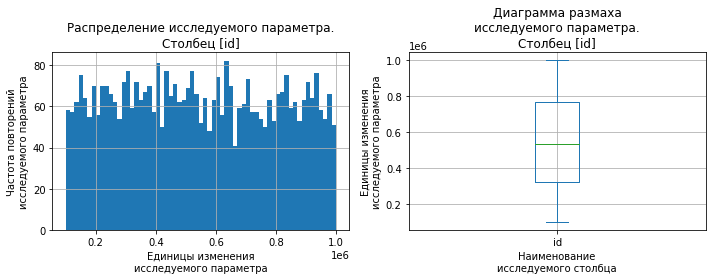

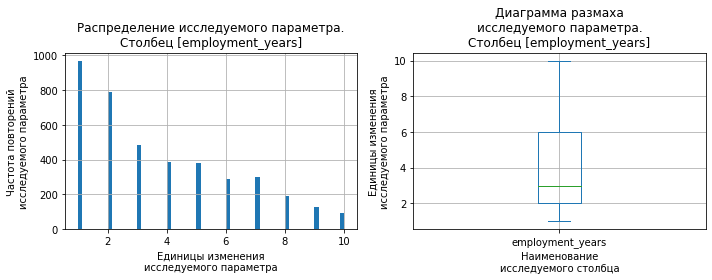

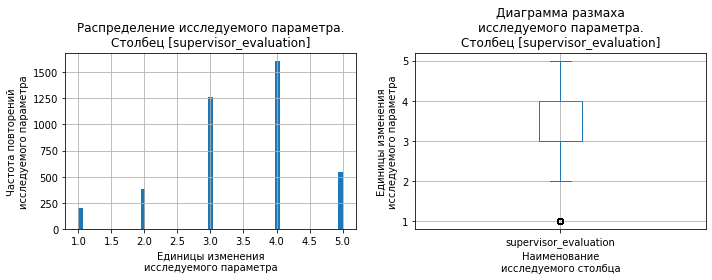

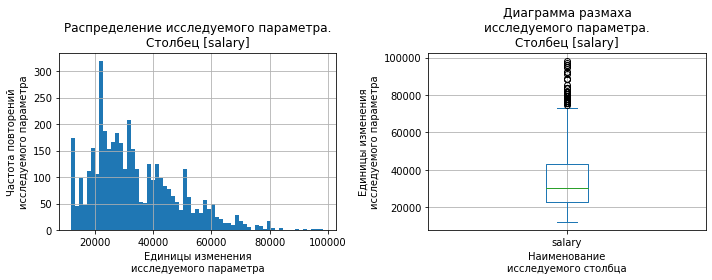

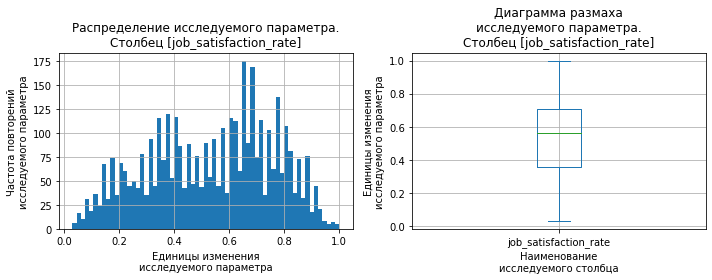

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
2554,714265,purchasing,junior,low,3,no,no,3,15600,0.53
1014,895602,sales,sinior,high,7,no,yes,4,72000,0.73
2097,113614,technology,middle,high,6,no,no,4,68400,0.88
1366,488802,sales,junior,low,1,no,no,4,15600,0.70
2232,255774,sales,junior,low,1,no,no,4,12000,0.57


In [15]:
# Изучим общую информацию о данных
overview(data_train_rate)

На основании общих сведений о входных данных таблицы `data_train_rate` сделаем выводы об их полноте и качестве для целей исследования:

1. Столбец "id" представляет собой ключевой столбец с равномерно возрастающими уникальными кодами пользователей. Будем использовать его для объединения таблиц. В будущем столбец будет преобразован в индекс и удален;
2. В таблице обнаружены пропуски данных в столбцах `dept` и `level`. Необходимо изучение и обработка.
3. Проблем с типами данных не обнаружено, однако столбцы `last_year_promo` и `last_year_violations` могут быть преобразованы к типу данных boolean.
4. В столбцах с типом данных str могут оказаться неявные дубликаты. Необходимо проверить столбцы `dept`, `level`, `workload`, `last_year_promo` и `last_year_violations` с категориальными признаками.
5. Предварительный анализ распределений количественных признаков показал наличие выбросов в столбце `salary`. Однако, значения выбросов не кажутся аномальными. Аналогично в столбце `supervisor_evaluation`. Необходимо проверить данный на этапе исследовательского анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


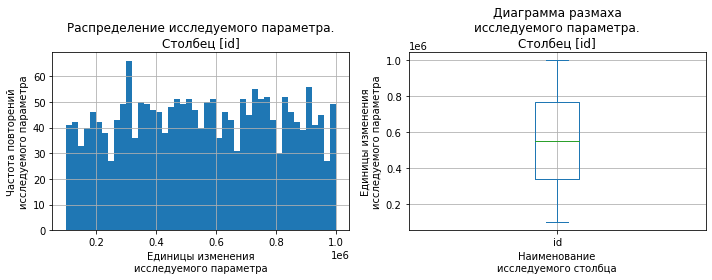

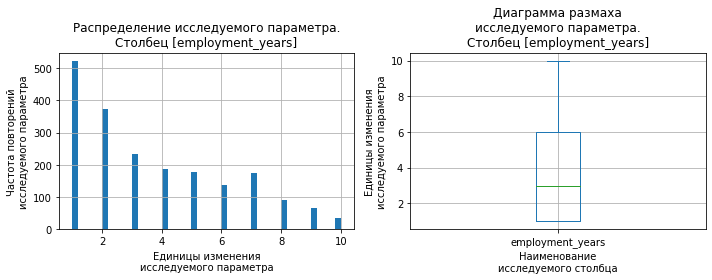

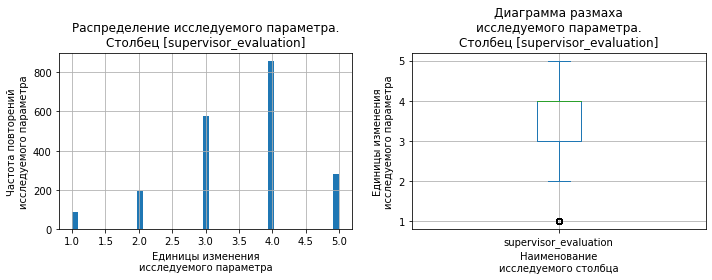

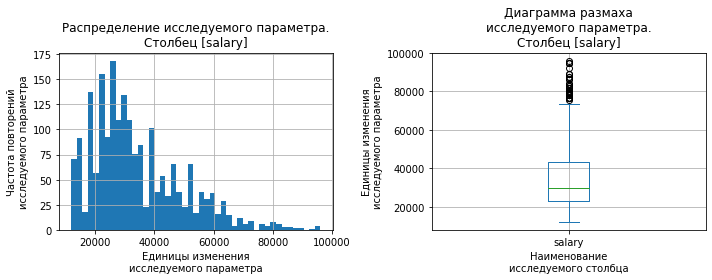

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1621,508934,sales,junior,low,2,no,no,4,15600
5,429973,purchasing,middle,medium,6,no,no,3,42000
169,300475,purchasing,middle,low,4,no,no,2,19200
975,605519,technology,sinior,high,3,no,no,3,84000
1980,410770,sales,junior,medium,4,no,no,5,28800


In [16]:
# Изучим общую информацию о данных
overview(data_test_features)

На основании общих сведений о входных данных таблицы `data_test_features` выводы полностью аналогичны таблице `data_train_rate`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


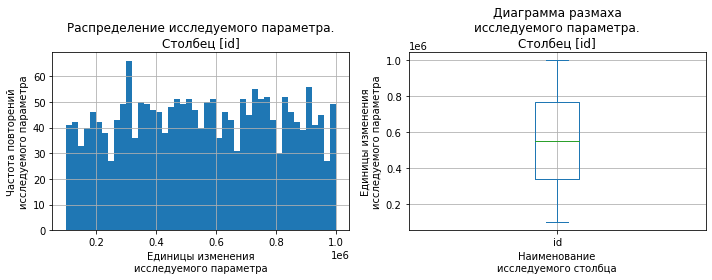

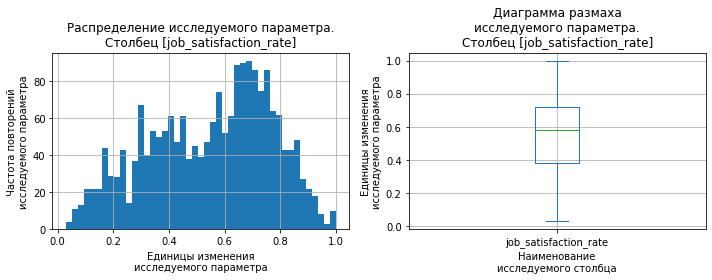

,id,job_satisfaction_rate
468,891551,0.38
259,904998,0.43
537,399847,0.65
1513,309991,0.67
556,711262,0.60


In [17]:
# Изучим общую информацию о данных
overview(data_test_target_rate)

На основании общих сведений о входных данных таблицы `data_test_target_rate` проблем не обнаружено.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


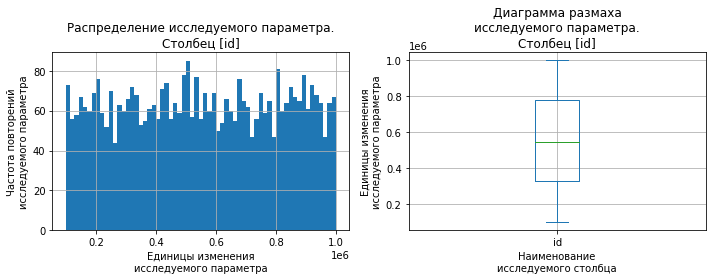

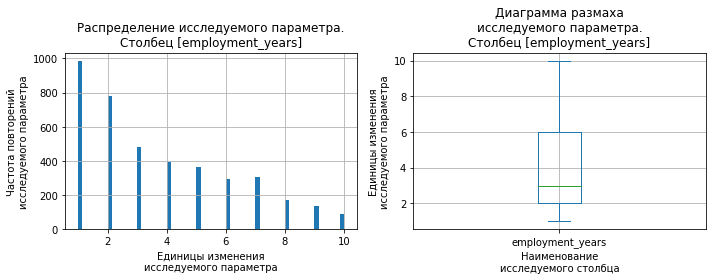

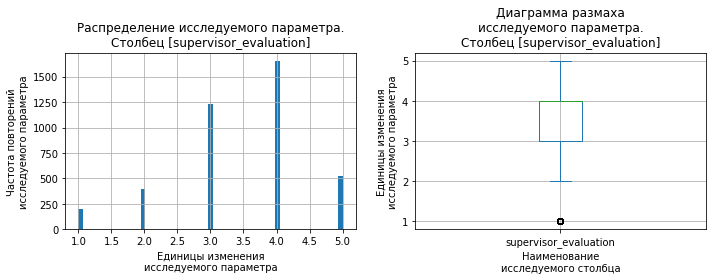

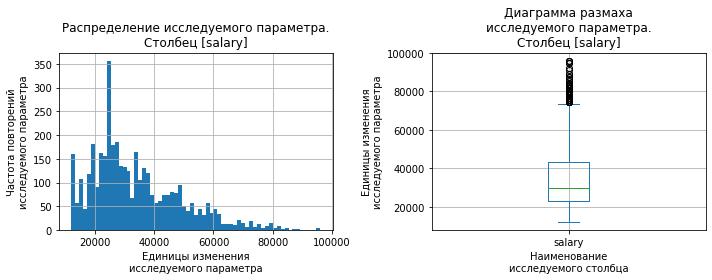

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1542,123888,hr,junior,low,1,no,no,4,13200,yes
3423,323199,technology,middle,low,5,no,no,3,27600,no
3050,966191,technology,junior,medium,3,no,no,3,34800,yes
3928,119542,technology,junior,medium,2,no,no,4,27600,no
1320,867867,technology,junior,medium,1,no,no,4,34800,no


In [18]:
# Изучим общую информацию о данных
overview(data_train_quit)

На основании общих сведений о входных данных таблицы `data_train_quit` выводы полностью аналогичны таблице `data_train_rate`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


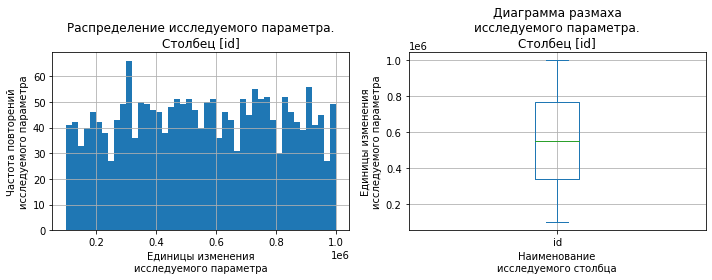

,id,quit
1050,899129,yes
261,843590,no
1950,180509,no
1428,925210,no
104,914306,yes


In [19]:
# Изучим общую информацию о данных
overview(data_test_target_quit)

На основании общих сведений о входных данных таблицы `data_test_target_quit` проблем не обнаружено.

### Вывод по разделу "Загрузка и изучение входных данных"

В ходе изучения входных данных были сделаны следующие выводы.

1. Столбец "id" всех таблицах представляет собой ключевой столбец с равномерно возрастающими уникальными кодами пользователей. Будем использовать его для объединения таблиц. В будущем столбец будет преобразован в индекс и удален.

    **Обратим внимание, что нам не известно, все ли впорядке с количеством работников в перечнях в каждом файле. Соответсвуют ли перечни работников в файлах `test_features.csv` (таблица `data_test_features`), `test_target_job_satisfaction_rate.csv` (таблица `data_test_target_rate`) и `test_target_quit.csv` (таблица `data_test_target_quit`). Общее количество записей - 2000.**
    
    **Также важный вопрос - нет ли дублирования записей в тренировочной и тестовой выборках (таблица `data_train_rate`, количество записей - 4000)?**
    
    Проверим указанные вопросы на этапе предообработки данных или подготовки данных к обучению.

2. В таблицах `data_train_rate` и `data_test_features` обнаружены пропуски данных в столбцах `dept` и `level`. Необходимо изучение и обработка.
3. Проблем с типами данных не обнаружено, однако в таблицах `data_train_rate` и `data_test_features` столбцы `last_year_promo` и `last_year_violations` могут быть преобразованы к типу данных boolean.
4. В столбцах с типом данных str могут оказаться неявные дубликаты. Необходимо проверить столбцы `dept`, `level`, `workload`, `last_year_promo` и `last_year_violations` в таблицах `data_train_rate` и `data_test_features` с категориальными признаками.
5. Предварительный анализ распределений количественных признаков показал наличие выбросов в столбце `salary` в таблицах `data_train_rate` и `data_test_features`. Однако, значения выбросов не кажутся аномальными. Аналогично в столбце `supervisor_evaluation`. Необходимо проверить данный на этапе исследовательского анализа.

## Шаг 2. Предобработка данных

Прозведем предобработку данных на основании ранее сделанных выводов:

1. Проверим важные предположения о достаточности данных для обучения и тестирования моделей, отстутствии дублирования данных.
2. Изучим и обработаем пропуски в данных.
3. Проверим предположение о наличии неявных дубликатов и обработаем их при необходимости.
4. Изменим типы данных столбцов в соответствии с их содержанием.

Предварительно создадим копии входных данных для дальнейшей работы.

In [20]:
# Тренировочные данные для задачи 1
train_rate = data_train_rate.copy()

# Тренировочные данные для задачи 2
train_quit = data_train_quit.copy()

# Тестовые данные для обоих задач
test_features = data_test_features.copy()
test_target_rate = data_test_target_rate.copy()
test_target_quit = data_test_target_quit.copy()

### Проверка предварительных предположений о качестве данных

Нам не известно, все ли впорядке с количеством работников в перечнях в дата-сетах. 

Проверим предположение, что перечни работников в файлах test_features.csv (таблица test_features), test_target_job_satisfaction_rate.csv (таблица test_target_rate) и `test_target_quit.csv` (таблица `test_target_quit`) могут отличаться. Общее количество записей - 2000. Объединим эти таблицы

In [21]:
test_data = (
    test_features
    .join(test_target_rate.set_index('id'), on='id', how='left')
)
test_data = (
    test_data
    .join(test_target_quit.set_index('id'), on='id', how='left')
)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


Проблем не возникло, новых пропусков не появилось. Предположение не подтвердилось. В дальнейшей работе будем использовать новый дата-сет тестовых данных `test_data`.

Проверим нет ли дублирования записей в обеих тренировочных (таблица `data_train_rate`, количество записей - 4000 и таблица `data_test_target_quit`, количество записей - 4000) и тестовой (таблица `test_data`, количество записей - 4000) выборках.

In [22]:
rate_train_ids = train_rate['id'].sort_values(ascending=False).unique()
rate_train_ids

array([999521, 999348, 999264, ..., 101074, 101057, 100954], dtype=int64)

In [23]:
quit_train_ids = train_quit['id'].sort_values(ascending=False).unique()
quit_train_ids

array([999915, 999835, 999158, ..., 100469, 100459, 100222], dtype=int64)

In [24]:
test_ids = test_data['id'].sort_values(ascending=False).unique()
test_ids

array([999029, 998900, 998762, ..., 100503, 100480, 100298], dtype=int64)

In [25]:
check_identical([rate_train_ids, quit_train_ids, test_ids])

[]

Дублирующихся работников не имеется. Переведем столбец в индексы для всех таблиц. В будущем для обучения моделей указанный столбец не понадобится.

In [26]:
train_rate = train_rate.set_index('id')
train_rate.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11


In [27]:
train_quit = train_quit.set_index('id')
train_quit.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no


In [28]:
test_data = test_data.set_index('id')
test_data.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no


In [29]:
print(train_rate.shape, train_quit.shape, test_data.shape)

(4000, 9) (4000, 9) (2000, 10)


### Обработка пропусков

В таблицах `train_rate` и `test_features` (`test_data`) обнаружены пропуски данных в столбцах `dept` и `level`.

Изучим пропуски.

In [30]:
# Определим количество пропущенных значений для каждого столбца
train_rate.isna().sum()

dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [31]:
# Определим количество пропущенных значений для каждого столбца
test_data.isna().sum()

dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
quit                     0
dtype: int64

Пропусков не много, изучим их.

In [32]:
train_rate[train_rate['dept'].isna()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
694746,NaN,junior,medium,5,no,no,4,21600,0.62
814624,NaN,junior,medium,3,no,no,4,24000,0.88
475114,NaN,junior,high,4,no,no,4,31200,0.63
497243,NaN,junior,medium,1,no,no,3,26400,0.28
168668,NaN,junior,low,3,no,no,4,18000,0.88
641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [33]:
train_rate[train_rate['level'].isna()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
631073,sales,NaN,medium,1,no,no,4,27600,0.66
416327,sales,NaN,low,1,no,no,5,18000,0.73
135043,sales,NaN,medium,1,no,no,3,26400,0.30
998838,sales,NaN,medium,1,no,no,5,27600,0.71


In [34]:
test_data[test_data['dept'].isna()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
609865,NaN,junior,medium,1,no,no,1,20400,0.12,yes
832342,NaN,junior,medium,1,no,no,4,28800,0.61,no


In [35]:
test_data[test_data['level'].isna()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
471990,sales,NaN,low,1,no,no,3,12000,0.17,yes


Пропуски в категориальных признаках `dept` и `level` сложны для заполнения на основании существующих данных. Можно попробовать оценить департамент и уровень работника на основании значений в столбце `salary`, если сравнить медианные значения зарплат. Попробуем.

In [36]:
salary_by_level = (
    train_rate[train_rate['dept'] == 'sales']
    .pivot_table(index='level', values='salary', aggfunc=['median', 'min', 'max'])
)
salary_by_level

,median,min,max
,salary,salary,salary
level,,,
junior,21600,12000,38400
middle,38400,18000,60000
sinior,51600,25200,79200


In [37]:
salary_by_dept = (
    train_rate
    .pivot_table(index='dept', values='salary', aggfunc=['median', 'min', 'max'])
)
salary_by_dept

,median,min,max
,salary,salary,salary
dept,,,
hr,30000,12000,81600
marketing,31200,13200,84000
purchasing,28800,12000,80400
sales,27600,12000,79200
technology,34800,14400,98400


Увы, это предположения сделать сложно. Значения зарплат слишком различны.

Для обучения разрабатываемых моделей мы можем удалить строки с пропущенными значениями, однако, указанные пропуски могут появиться в данных, на которых в будущем будет работать модель. Связано это с тем, что указанные пропуски могли появиться в результате заполнения работниками анкет. Не все работники могли указать требуемые данные или пропустить их случайно или специально. При этом, пропуски могут появиться в любом столбце. Будем обрабатывать их одинаково.

В этой связи необходимо применить метод обработки пропусков, который может быть использован как при обучении, так и при оценке качества моделей и в продакшн.

Для этого будем использовать обработчик пропусков в составе разрабатываемого pipeline перед кодированием и масштабированием признаков. Применим обработчик SimpleImputer со стратегией 'most_frequent'.

При создании pipeline в будущем используем представленный ниже код.

### Обработка дубликатов

В ходе первичного ознакомления с данными было выявлено:
1. В столбцах с типом данных str могут оказаться неявные дубликаты. Необходимо проверить столбцы `dept`, `level`, `workload`, `last_year_promo` и `last_year_violations` в таблицах `data_train_rate` и `data_test_features` с категориальными признаками.
2. Проблем с типами данных не обнаружено, однако в таблицах `data_train_rate` и `data_test_features` столбцы `last_year_promo` и `last_year_violations` могут быть преобразованы к типу данных boolean.

Предварительно проверим наличие полных дубликатов в таблицах.

In [38]:
# Тренировочные данные для задачи 1
train_rate.duplicated().sum()

245

In [39]:
# Тренировочные данные для задачи 2
train_quit.duplicated().sum()

1413

In [40]:
# Тестовые данные
test_data.duplicated().sum()

74

In [41]:
train_rate = train_rate.drop_duplicates()

In [42]:
train_quit = train_quit.drop_duplicates()

Дополнительное глубокое изучение дубликатов представлено в приложении к работе. в результате такого изучения сделан вывод о крайне низком качестве данных и они возвращены заказчику на доработку.

**Полные явные и полные НЕЯВНЫЕ дубликаты теперь отсутствуют.**

Изучим отдельные столбцы на предмет наличия неявных дубликатов.

In [43]:
col_for_check = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
]

In [44]:
check_duplicates(train_rate, col_for_check)

Проверяем столбец [dept]
---> Количество уникальных значений: 5
---> Количество уникальных значенийпосле приведения к нижнему регистру: 5
---> Уникальные значения: ['hr' 'marketing' 'purchasing' 'sales' 'technology' nan]
%%%
Проверяем столбец [level]
---> Количество уникальных значений: 3
---> Количество уникальных значенийпосле приведения к нижнему регистру: 3
---> Уникальные значения: ['junior' 'middle' 'sinior' nan]
%%%
Проверяем столбец [workload]
---> Количество уникальных значений: 3
---> Количество уникальных значенийпосле приведения к нижнему регистру: 3
---> Уникальные значения: ['high' 'low' 'medium']
%%%
Проверяем столбец [last_year_promo]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значения: ['no' 'yes']
%%%
Проверяем столбец [last_year_violations]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значения: ['no'

In [45]:
check_duplicates(train_quit, col_for_check)

Проверяем столбец [dept]
---> Количество уникальных значений: 5
---> Количество уникальных значенийпосле приведения к нижнему регистру: 5
---> Уникальные значения: ['hr' 'marketing' 'purchasing' 'sales' 'technology']
%%%
Проверяем столбец [level]
---> Количество уникальных значений: 3
---> Количество уникальных значенийпосле приведения к нижнему регистру: 3
---> Уникальные значения: ['junior' 'middle' 'sinior']
%%%
Проверяем столбец [workload]
---> Количество уникальных значений: 3
---> Количество уникальных значенийпосле приведения к нижнему регистру: 3
---> Уникальные значения: ['high' 'low' 'medium']
%%%
Проверяем столбец [last_year_promo]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значения: ['no' 'yes']
%%%
Проверяем столбец [last_year_violations]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значения: ['no' 'yes']


In [46]:
check_duplicates(test_data, col_for_check)

Проверяем столбец [dept]
---> Количество уникальных значений: 6
---> Количество уникальных значенийпосле приведения к нижнему регистру: 6
---> Уникальные значения: [' ' 'hr' 'marketing' 'purchasing' 'sales' 'technology' nan]
%%%
Проверяем столбец [level]
---> Количество уникальных значений: 3
---> Количество уникальных значенийпосле приведения к нижнему регистру: 3
---> Уникальные значения: ['junior' 'middle' 'sinior' nan]
%%%
Проверяем столбец [workload]
---> Количество уникальных значений: 4
---> Количество уникальных значенийпосле приведения к нижнему регистру: 4
---> Уникальные значения: [' ' 'high' 'low' 'medium']
%%%
Проверяем столбец [last_year_promo]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значения: ['no' 'yes']
%%%
Проверяем столбец [last_year_violations]
---> Количество уникальных значений: 2
---> Количество уникальных значенийпосле приведения к нижнему регистру: 2
---> Уникальные значени

В тренировочных данных не обнаружено неявных дубликатов.

В то же время в тестовых данных **выявлены неизвестные значения для категориальных признаков `dept` и `workload` - пробелы!** Фактически, это пропуски данных.

Тестовые данные исправлять на текущем этапе не будем. Учтем обнаруженное при разработке моделей. При кодировании категориальных признаков не забудем обработать неизвестные (пропущенный в нашем случае) значения. Учтем в следующем коде:

А сейчас исправим тестовые данные.

In [47]:
test_data = test_data.query('dept != " " and workload != " "')
test_data

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
686555,hr,junior,medium,1,no,no,4,30000,0.72,no
467458,sales,middle,low,5,no,no,4,19200,0.64,no
418655,sales,middle,low,6,no,no,4,19200,0.60,no
789145,hr,middle,medium,5,no,no,5,40800,0.75,no
...,...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.56,yes
109582,technology,middle,low,3,no,no,2,21600,0.14,yes
305653,technology,junior,low,1,no,no,3,14400,0.11,yes


### Вывод по разделу "Предобработка данных"

В ходе предобработки данных были достигнуты следующие результаты:

1. Предварительно были проверены два предположения:
    1. Об отличии перечней работников в разных таблицах тестовых данных. Отличий не обнаружен. Различные таблицы объеденены в единую. В дальнейшем будем использовать таблицу `test_data`.
    2. О дублировании записей в обеих тренировочных и тестовой выборках. Все пользователи уникальны, проблем не обнаружено.


2. Изучены пропуски в данных. Пропуски данных в столбцах `dept` и `level` в таблицах `train_rate` и `test_data` сложно заполнить на основании логических выводов по другим данным. Указанные пропуски могли появиться в результате заполнения работниками анкет. Не все работники могли указать требуемые данные или пропустить их случайно или специально. Такие пропуски могут появиться в данных, на которых в будущем будет работать модель. При этом, пропуски могут появиться в любом столбце. 

    В этой связи принято решение применить метод обработки пропусков, который может быть использован как при обучении, так и при оценке качества моделей и в продакшн. Для этого будет использован обработчик пропусков в составе разрабатываемого pipeline перед кодированием и масштабированием признаков. Применим обработчик SimpleImputer со стратегией 'most_frequent'.


3. Не были обнаружены явные полные дубликаты. Однако были выявлены неявные полные дубликаты. Различные работники (с различными id) имеют полностью совпадающие данные анкетирования. В целом, дубликатами указанные записи могут не являеться, однако, для обучения моделей их наличие нежелательно. При этом, такие дубликаты найдены во всех таблицах. Дубликаты были удалены.

4. В тестовых данных выявлены неизвестные значения для категориальных признаков dept и workload - пробелы! Фактически, это пропуски данных.

    Обработку неявлных дубликатов в тестовых данных принято решение не осуществлять. Такие дубликаты могут появиться в данных, на которых в будущем будет работать модель. В этой связи принято решение учесть обнаруженные дубликаты при разработке моделей при кодировании категориальных признаков как обработку неизвестных значений.


5. Изменение типа данных столбцов нецелесообразно, поскульку указанные столбцы подлежать дальнейшему кодированию, а реальные данные будут поступать в модель в исходом виде.

Предобработка данных завершена, данные готовы к дальнейшей очистки и анализу.

## Шаг 3. Исследовательский анализ данных

Проведем исследовательский анализ данных. В ходе анализа постараемся оценить:
1. Распределение категориальных признаков, применимость признаков для дальнейшей работы (достаточное распределение элемементов по признакам - репрезентативность).
2. Распределение количественных признаков, в том числе, тип распределений для дальнейшей работы по разработке моделей машинного обучения, наличие выбросов и аномальных значений.

**I. Для каждого столбца с категориальными признаками:**
1. Построим круговую диаграмму (если количество категорий не превышает 4) или столбчатую диаграмму для столбцов с количеством категорий более 4.
2. Оценим репрезентативность классов каждого признака. Оценим необходимость балансировки классов.

Исследуемые столбцы с категориальными признаками:
- таблица `train_rate`
    - `dept`
    - `level`
    - `workload`
    - `last_year_promo`
    - `last_year_violations`
    
Для выполнения работ в соответствии с описанным подходом будем использовать созданные функции.

**II. Для каждого столбца с количественным параметром:**
1. Определим количественные характеристики распределений значений, построим гистрограммы и диаграммы размаха.
2. Определим выбросы. При необходимости более внимательно изучим выбросы в части их влияния на цель исследования и примем решение об их исправлении или удалении.<br>Основным критерием удаления выбросов определим их выход за пределы диаграммы размаха. При количестве строк с аномальными значениями менее 5% выборки, такие строки приоритетны к удалению, но может потребоваться дополнительный анализ.<br>При количестве выбросов более 5% их удаление производить не будем до исследования других параметров. Создадим запрос для использования метода query() в будущем с целью фильтрации данных.
3. После очистки данных изучим их распределение, визуализируем. Сделаем выводы.
4. Проверим нормальность распределения значений столбца.

Исследуемые столбцы с количественным параметром:
- таблица `train_rate`
    - `employment_years`
    - `supervisor_evaluation`
    - `salary`
    
Для выполнения работ будем использовать созданные функции, выводящие результаты анализа для категориальных признаков в соответствии с описанным выше подходом

**III. Целевой признак первой задачи `job_satisfaction_rate`** - непрерывный количественный. Исследуем его совместно с количественными признаками.

**IV. Целевой признак второй задачи `quit`** - бинарный категориальный. Исследуем его совместно с категориальными признаками.

### I. Исследование категориальных признаков

Таблица `train_rate`

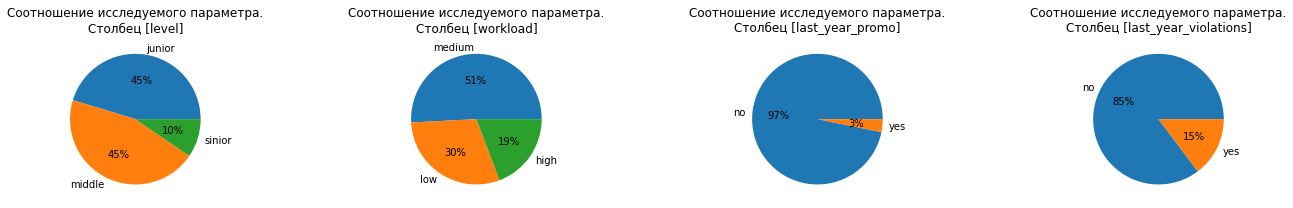

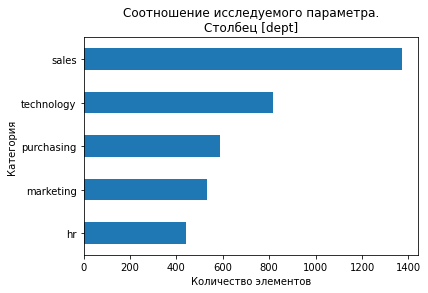

In [48]:
cat_names = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations',
]

analysis_cat_cols(train_rate, cat_names)

Таблица `train_quit`

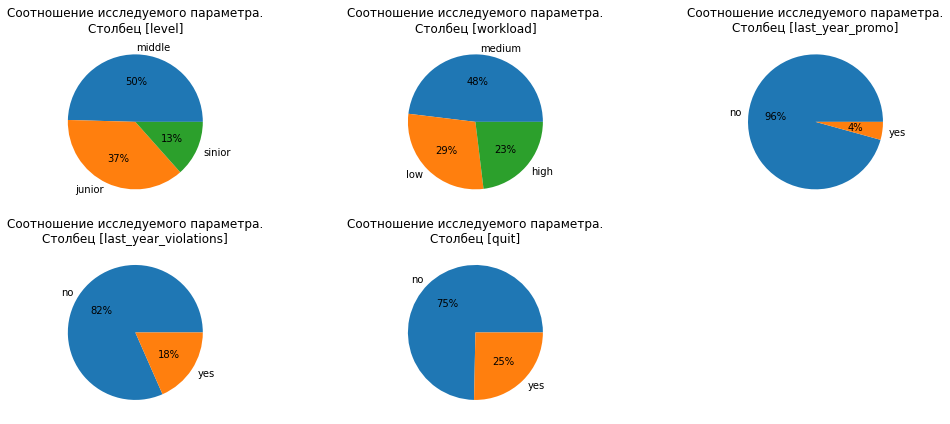

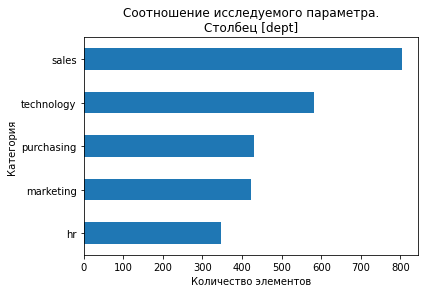

In [49]:
cat_names = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations',
    'quit',
]

analysis_cat_cols(train_quit, cat_names)

Таблица `test_data`

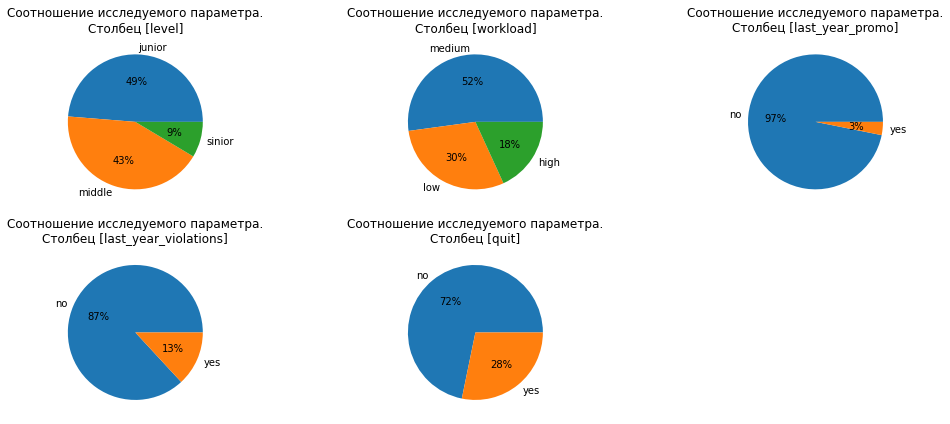

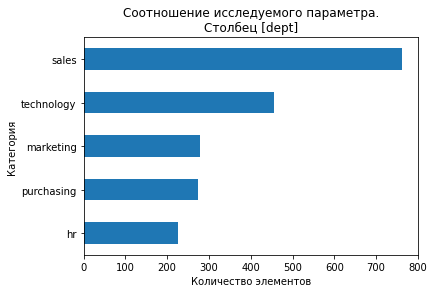

In [50]:
cat_names = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations',
    'quit',
]

analysis_cat_cols(test_data, cat_names)

**Промежуточный вывод**

Для всех категориальных входных признаков выявлен дисбаланс, который может оказать влияние на результаты анализа данных, в частности:
1. Признак `level`. Работников уровня "Сеньор" значительно меньше, чем работников других уровней. Конечно, такой дисбаланс связан со спецификой задачи.
2. Признак `workload`. Загруженность работников также разнится, но достаточно логично. Наибольшее количество работников имеет среднюю загрузку.
3. Признак `last_year_promo`. Повышение за последний год получили совсем немного работников, что также довольно логично. Указанный признак сложен для обучения модели. Вероятно, модель может не учесть его.
4. Признак `last_year_violations`. Ситуация аналогична предыдущему признаку.
5. Признак `dept`. Дисбаланс имеется, но он связан со спецификой задачи.

Устранять дисбаланс входных признаков при обучени линейных моделей дисбаланс устранять не будем. Для повышения точности предсказаний модели для классов, слабо представленных в данных, рекомендуется собрать больше информации.
При обучении иных моделей использовуем параметр class_weight для балансировки классов. Это позволит модели лучше учитывать редкие классы и снизить проблему переобучения на популярных классах.

Кроме того, для обучения моделей необходимо провести кодирование категориальных признаков:
1. Категориальные ранговые признаки `workload` (low->medium->high) и `level` (junior -> middle -> sinior) закодируем с используем OrdinalEncoder.
2. Категориальные номинальный признак `dept` и бинарные `last_year_promo`, `last_year_violations`  закодируем с использованем OneHotEncoder, поскольку логичную связь между категориями выстроить нельзя. Кодирование с использованием OrdinalEncoder может привести к тому, что модель может принять, что между категориями есть логичная математическая связь, хотя в действительности её нет.

### II. Исследование количественных признаков

Исследуем столбцы с количественным параметром:
- таблица `train_rate`
    - `employment_years`
    - `supervisor_evaluation`
    - `salary`
    - `job_satisfaction_rate`
    
    
- таблица `train_quit`
    - `employment_years`
    - `supervisor_evaluation`
    - `salary`
    
    
- таблица `test_data`
    - `employment_years`
    - `supervisor_evaluation`
    - `salary`
    - `job_satisfaction_rate`

**Столбец `employment_years`**

В рассматриваемом столбце представлены значения количественного дискретного параметра. Выведем основные характеристики для анализа с использованием созданной функции для всех таблиц.

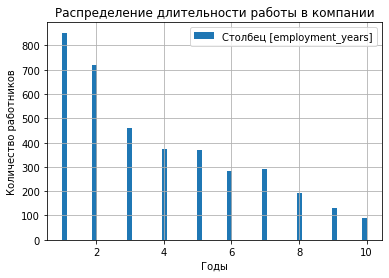


Ключевые характеристики распределения:
count    3755.00
mean        3.82
std         2.56
min         1.00
25%         2.00
50%         3.00
75%         6.00
max        10.00
Name: employment_years, dtype: object

Ключевые характеристики диграммы размаха:
IQR			4.00
Q1-1,5*IQR		-4.00
MIN диаграммы размаха	1.00
Q3+1,5*IQR		12.00
MAX диаграммы размаха	10.00



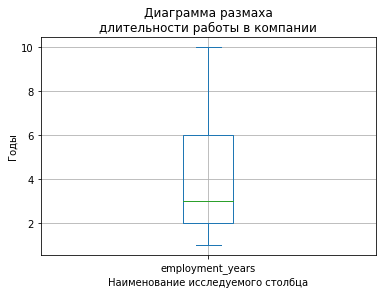

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [51]:
my_describe(
    train_rate, 'employment_years',
    hist_desc=[
        'Распределение длительности работы в компании',
        'Годы',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nдлительности работы в компании',
        'Наименование исследуемого столбца',
        'Годы'
    ]
)

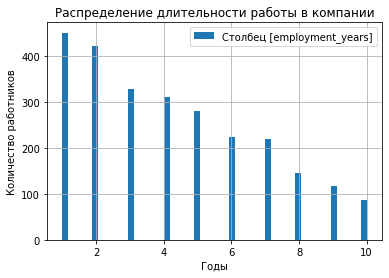


Ключевые характеристики распределения:
count    2587.00
mean        4.21
std         2.60
min         1.00
25%         2.00
50%         4.00
75%         6.00
max        10.00
Name: employment_years, dtype: object

Ключевые характеристики диграммы размаха:
IQR			4.00
Q1-1,5*IQR		-4.00
MIN диаграммы размаха	1.00
Q3+1,5*IQR		12.00
MAX диаграммы размаха	10.00



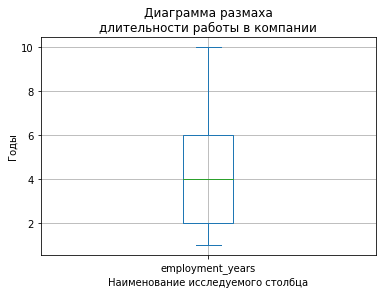

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [52]:
my_describe(
    train_quit, 'employment_years',
    hist_desc=[
        'Распределение длительности работы в компании',
        'Годы',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nдлительности работы в компании',
        'Наименование исследуемого столбца',
        'Годы'
    ]
)

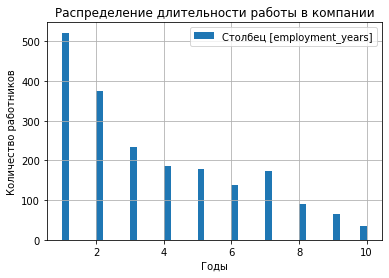


Ключевые характеристики распределения:
count    1998.00
mean        3.67
std         2.54
min         1.00
25%         1.00
50%         3.00
75%         6.00
max        10.00
Name: employment_years, dtype: object

Ключевые характеристики диграммы размаха:
IQR			5.00
Q1-1,5*IQR		-6.50
MIN диаграммы размаха	1.00
Q3+1,5*IQR		13.50
MAX диаграммы размаха	10.00



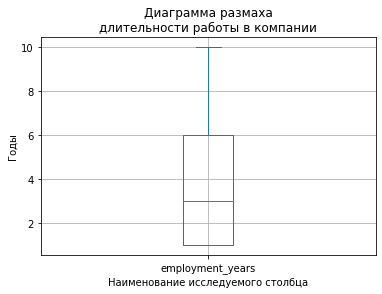

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [53]:
my_describe(
    test_data, 'employment_years',
    hist_desc=[
        'Распределение длительности работы в компании',
        'Годы',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nдлительности работы в компании',
        'Наименование исследуемого столбца',
        'Годы'
    ]
)

Визуализируем данные

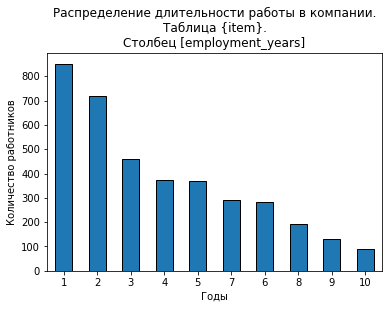

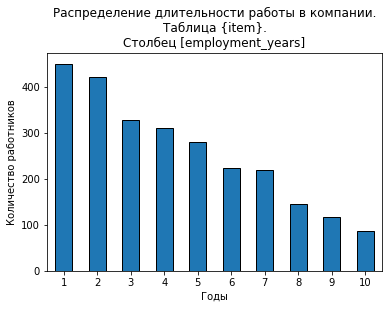

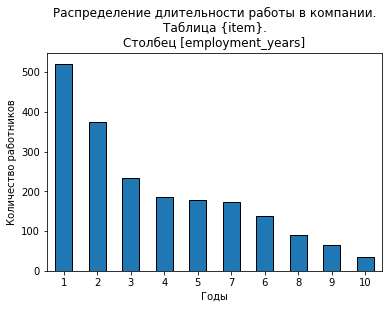

In [54]:
temp_data = {
    'train_rate': train_rate['employment_years'],
    'train_quit': train_quit['employment_years'],
    'test_data': test_data['employment_years']
}

for item in temp_data:
    temp_data[item].value_counts(ascending=False).plot(
        kind = 'bar', 
        edgecolor='black',
        rot=0
    )   
    plt.title(
        f'Распределение длительности работы в компании.'
        '\nТаблица {item}.\nСтолбец [employment_years]')
    plt.ylabel('Количество работников')
    plt.xlabel('Годы')
    plt.show()

_**Вывод**_

В результате анализа выявлено, что больше всего работников работают в компании в течение 1 года. С увеличением продолжительности работы количество работников уменьшается.

**Столбец `supervisor_evaluation`**

В рассматриваемом столбце представлены значения количественного дискретного параметра. Выведем основные характеристики для анализа с использованием созданной функции для всех таблиц.

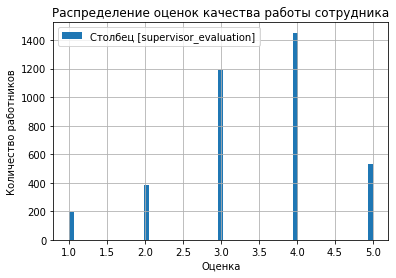


Ключевые характеристики распределения:
count    3755.00
mean        3.46
std         1.03
min         1.00
25%         3.00
50%         4.00
75%         4.00
max         5.00
Name: supervisor_evaluation, dtype: object

Ключевые характеристики диграммы размаха:
IQR			1.00
Q1-1,5*IQR		1.50
MIN диаграммы размаха	1.50
Q3+1,5*IQR		5.50
MAX диаграммы размаха	5.00



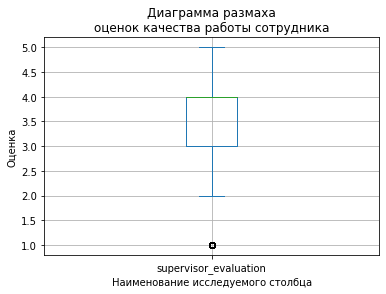

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	198
Доля выбросов (вниз)		5.27%


In [55]:
my_describe(
    train_rate, 'supervisor_evaluation',
    hist_desc=[
        'Распределение оценок качества работы сотрудника',
        'Оценка',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nоценок качества работы сотрудника',
        'Наименование исследуемого столбца',
        'Оценка'
    ]
)

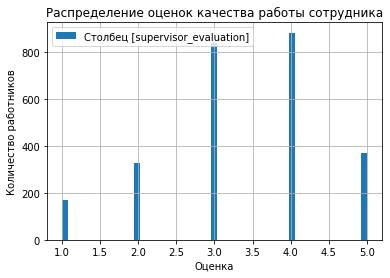


Ключевые характеристики распределения:
count    2587.00
mean        3.37
std         1.08
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: supervisor_evaluation, dtype: object

Ключевые характеристики диграммы размаха:
IQR			1.00
Q1-1,5*IQR		1.50
MIN диаграммы размаха	1.50
Q3+1,5*IQR		5.50
MAX диаграммы размаха	5.00



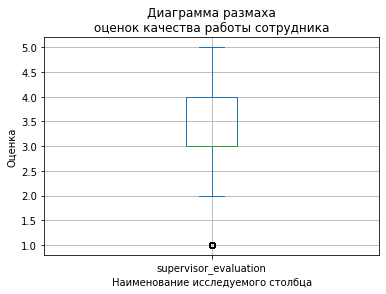

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	171
Доля выбросов (вниз)		6.61%


In [56]:
my_describe(
    train_quit, 'supervisor_evaluation',
    hist_desc=[
        'Распределение оценок качества работы сотрудника',
        'Оценка',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nоценок качества работы сотрудника',
        'Наименование исследуемого столбца',
        'Оценка'
    ]
)

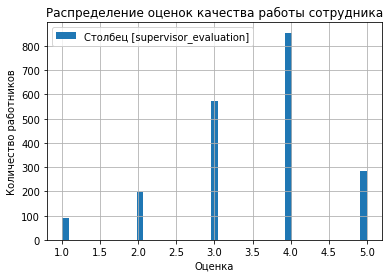


Ключевые характеристики распределения:
count    1998.00
mean        3.53
std         1.00
min         1.00
25%         3.00
50%         4.00
75%         4.00
max         5.00
Name: supervisor_evaluation, dtype: object

Ключевые характеристики диграммы размаха:
IQR			1.00
Q1-1,5*IQR		1.50
MIN диаграммы размаха	1.50
Q3+1,5*IQR		5.50
MAX диаграммы размаха	5.00



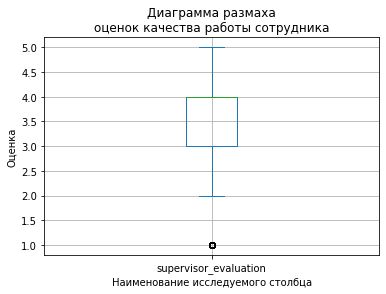

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	88
Доля выбросов (вниз)		4.40%


In [57]:
my_describe(
    test_data, 'supervisor_evaluation',
    hist_desc=[
        'Распределение оценок качества работы сотрудника',
        'Оценка',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nоценок качества работы сотрудника',
        'Наименование исследуемого столбца',
        'Оценка'
    ]
)

Выявлены выбросы вниз более 5% на диаграмме размаха. При этом минимум диаграммы размаха составил 1.5 единицы, а минимальные значения оценки - 1. Указанные "выбросы" таковыми не являются! Нулевых значений также не имеется.

In [58]:
(
    train_rate
    .query('supervisor_evaluation < 1.5')['supervisor_evaluation']
    .unique()
)

array([1], dtype=int64)

Визуализируем данные

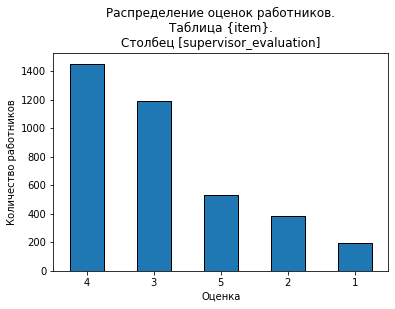

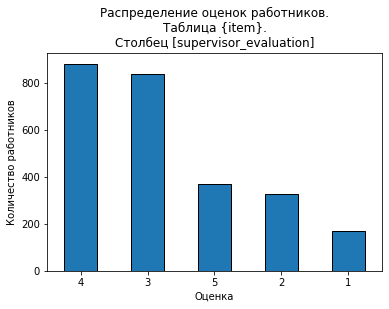

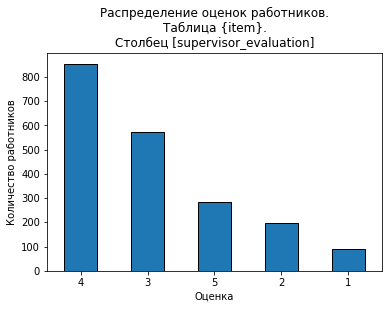

In [59]:
temp_data = {
    'train_rate': train_rate['supervisor_evaluation'],
    'train_quit': train_quit['supervisor_evaluation'],
    'test_data': test_data['supervisor_evaluation']
}

for item in temp_data:
    temp_data[item].value_counts(ascending=False).plot(
        kind = 'bar', 
        edgecolor='black',
        rot=0
    )   
    plt.title(
        f'Распределение оценок работников.'
        '\nТаблица {item}.\nСтолбец [supervisor_evaluation]'
    )
    plt.ylabel('Количество работников')
    plt.xlabel('Оценка')
    plt.show()

_**Вывод**_

В результате анализа выявлено, что больше всего работников получили оценку 4 и 3. Оценку 5 заслужили меньше работников. Также имеются работники, работу которых оценивают неудовлетворительно.

Фактически, данный признак представляет собой мультиклассовый категориальный ранговый. При обучении моделей закодируем его с использованием OrdinalEncoder, чтобы не увеличивать количество признаков.

**Столбец `salary`**

В рассматриваемом столбце представлены значения количественного дискретного параметра. Выведем основные характеристики для анализа с использованием созданной функции

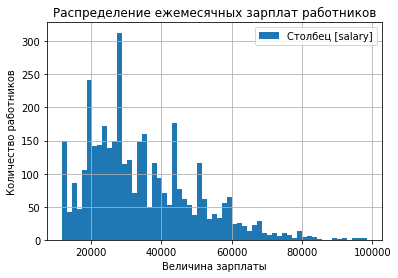


Ключевые характеристики распределения:
count     3755.00
mean     34457.42
std      15050.64
min      12000.00
25%      22800.00
50%      31200.00
75%      44400.00
max      98400.00
Name: salary, dtype: object

Ключевые характеристики диграммы размаха:
IQR			21600.00
Q1-1,5*IQR		-9600.00
MIN диаграммы размаха	12000.00
Q3+1,5*IQR		76800.00
MAX диаграммы размаха	76800.00



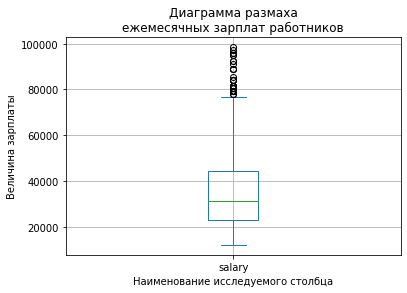

Ключевые характеристики выбросов:
Количество выбросов (вверх)	42
Доля выбросов (вверх)		1.12%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [60]:
my_describe(
    train_rate, 'salary',
    hist_desc=[
        'Распределение ежемесячных зарплат работников',
        'Величина зарплаты',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nежемесячных зарплат работников',
        'Наименование исследуемого столбца',
        'Величина зарплаты'
    ]
)

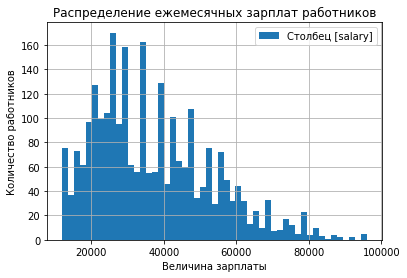


Ключевые характеристики распределения:
count     2587.00
mean     37107.69
std      16267.35
min      12000.00
25%      24000.00
50%      33600.00
75%      46800.00
max      96000.00
Name: salary, dtype: object

Ключевые характеристики диграммы размаха:
IQR			22800.00
Q1-1,5*IQR		-10200.00
MIN диаграммы размаха	12000.00
Q3+1,5*IQR		81000.00
MAX диаграммы размаха	81000.00



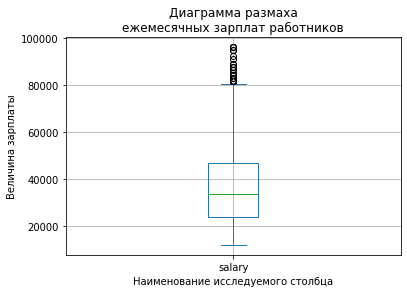

Ключевые характеристики выбросов:
Количество выбросов (вверх)	27
Доля выбросов (вверх)		1.04%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [61]:
my_describe(
    train_quit, 'salary',
    hist_desc=[
        'Распределение ежемесячных зарплат работников',
        'Величина зарплаты',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nежемесячных зарплат работников',
        'Наименование исследуемого столбца',
        'Величина зарплаты'
    ]
)

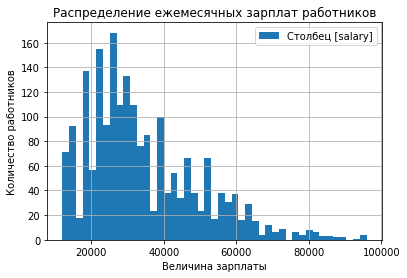


Ключевые характеристики распределения:
count     1998.00
mean     34067.27
std      15405.39
min      12000.00
25%      22800.00
50%      30000.00
75%      43200.00
max      96000.00
Name: salary, dtype: object

Ключевые характеристики диграммы размаха:
IQR			20400.00
Q1-1,5*IQR		-7800.00
MIN диаграммы размаха	12000.00
Q3+1,5*IQR		73800.00
MAX диаграммы размаха	73800.00



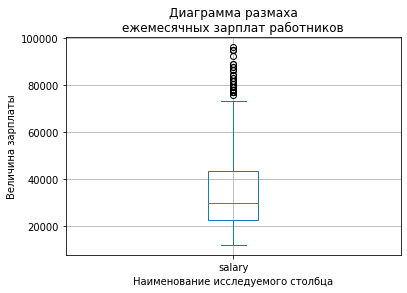

Ключевые характеристики выбросов:
Количество выбросов (вверх)	39
Доля выбросов (вверх)		1.95%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [62]:
my_describe(
    test_data, 'salary',
    hist_desc=[
        'Распределение ежемесячных зарплат работников',
        'Величина зарплаты',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nежемесячных зарплат работников',
        'Наименование исследуемого столбца',
        'Величина зарплаты'
    ]
)

Выявлены выбросы вниз менее 5% на диаграмме размаха. Изучим выбросы.

In [63]:
train_rate.query('salary > 73800').head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
538347,technology,sinior,high,3,no,no,1,84000,0.21
128304,marketing,sinior,high,7,no,no,3,80400,0.48
486576,marketing,sinior,high,9,no,no,4,76800,0.66
405345,marketing,sinior,high,7,no,no,2,81600,0.58
399126,sales,sinior,high,2,no,no,2,76800,0.26


В соответствии с диаграмой размаха работники уровня "Сеньор" являются выбросами. Отметаем данное решение. "Выбросы" не удаляем.

Визуализируем данные

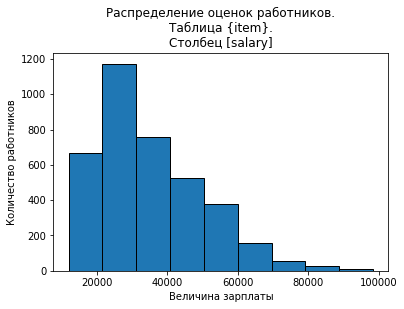

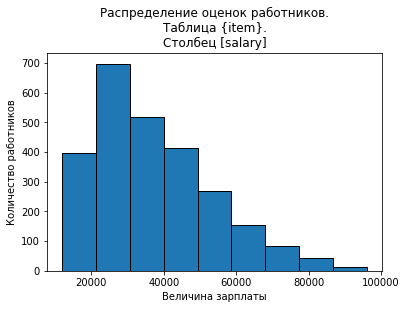

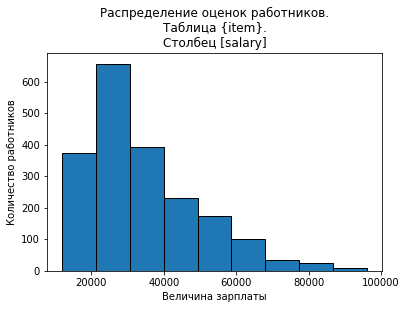

In [64]:
temp_data = {
    'train_rate': train_rate['salary'],
    'train_quit': train_quit['salary'],
    'test_data': test_data['salary']
}

for item in temp_data:
    plt.hist(temp_data[item], edgecolor='black', bins=9)
    plt.title(
        f'Распределение оценок работников.'
        '\nТаблица {item}.\nСтолбец [salary]'
    )
    plt.xlabel('Величина зарплаты')
    plt.ylabel('Количество работников')
    plt.show()

_**Вывод**_

Выявлены ключевые характеристики распределения ежемесячной зарплаты работников трех блоков данных:

- тренировочные данные первого блока:
    * среднее и медиана близки - 34457.42 и 31200.00;
    * зарплата 50% работников в диапазоне 28800.00 - 44400.00;
    * минимальное значение - 12000.00, максимальное - 98400.00.

- тренировочные данные второго блока:
    * среднее и медиана близки - 37107.69 и 33600.00;
    * зарплата 50% работников в диапазоне 24000.00 - 46800.00;
    * минимальное значение - 12000.00, максимальное - 96000.00.

- тестовые данные:
    * среднее и медиана близки - 34433.89 и 30000.00;
    * зарплата 50% работников в диапазоне 22800.00 - 43200.00;
    * минимальное значение - 12000.00, максимальное - 96000.00.
    
Распределение величины зарплат визуально представляет собой распределение Пуассона.

**Столбец `job_satisfaction_rate`**

В рассматриваемом столбце представлены значения количественного непрерывного параметра. Выведем основные характеристики для анализа с использованием созданной функции

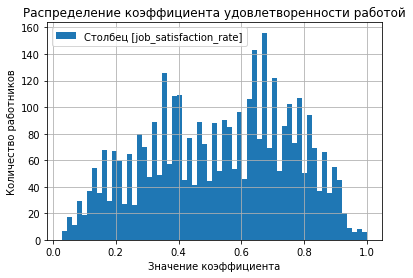


Ключевые характеристики распределения:
count    3755.00
mean        0.53
std         0.23
min         0.03
25%         0.35
50%         0.55
75%         0.71
max         1.00
Name: job_satisfaction_rate, dtype: object

Ключевые характеристики диграммы размаха:
IQR			0.36
Q1-1,5*IQR		-0.19
MIN диаграммы размаха	0.03
Q3+1,5*IQR		1.25
MAX диаграммы размаха	1.00



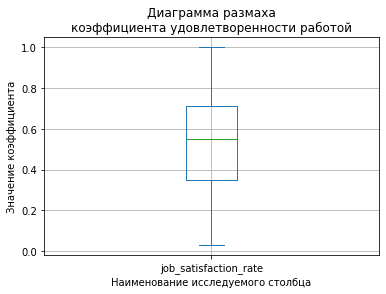

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [65]:
my_describe(
    train_rate, 'job_satisfaction_rate',
    hist_desc=[
        'Распределение коэффициента удовлетворенности работой',
        'Значение коэффициента',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nкоэффициента удовлетворенности работой',
        'Наименование исследуемого столбца',
        'Значение коэффициента'
    ]
)

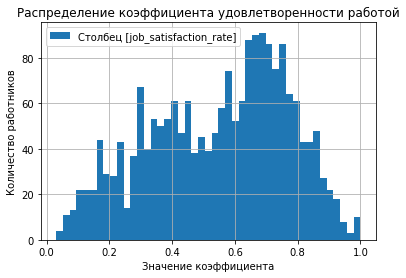


Ключевые характеристики распределения:
count    1998.00
mean        0.55
std         0.22
min         0.03
25%         0.38
50%         0.58
75%         0.72
max         1.00
Name: job_satisfaction_rate, dtype: object

Ключевые характеристики диграммы размаха:
IQR			0.34
Q1-1,5*IQR		-0.13
MIN диаграммы размаха	0.03
Q3+1,5*IQR		1.23
MAX диаграммы размаха	1.00



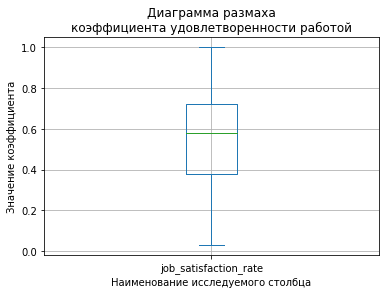

Ключевые характеристики выбросов:
Количество выбросов (вверх)	0
Доля выбросов (вверх)		0.00%
Количество выбросов (вниз)	0
Доля выбросов (вниз)		0.00%


In [66]:
my_describe(
    test_data, 'job_satisfaction_rate',
    hist_desc=[
        'Распределение коэффициента удовлетворенности работой',
        'Значение коэффициента',
        'Количество работников'
    ],
    box_desc=[
        'Диаграмма размаха\nкоэффициента удовлетворенности работой',
        'Наименование исследуемого столбца',
        'Значение коэффициента'
    ]
)

Выбросов не обнаружено.

Проверим нормальность распределения

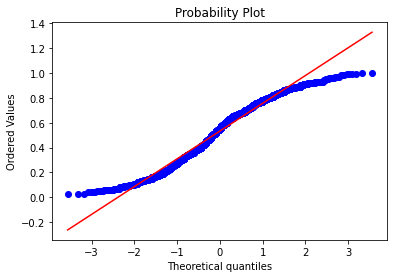

'p-value = 2.9875372810604e-166. Имеются основания говоритьо НЕнормальности распределения'

In [67]:
is_norm(train_rate['job_satisfaction_rate'])

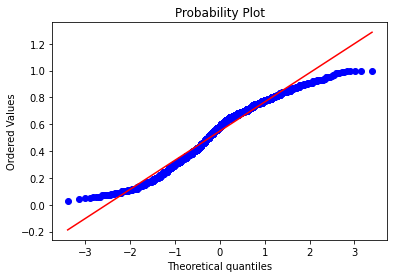

'p-value = 1.3641657687934484e-53. Имеются основания говоритьо НЕнормальности распределения'

In [68]:
is_norm(test_data['job_satisfaction_rate'])

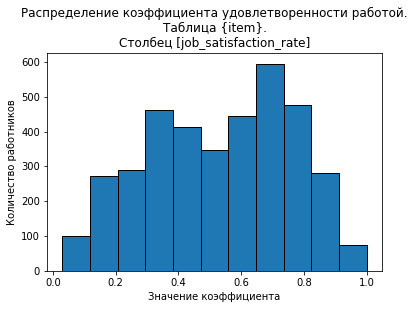

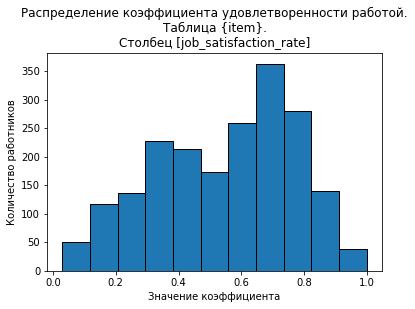

In [69]:
temp_data = {
    'train_rate': train_rate['job_satisfaction_rate'],
    'test_data': test_data['job_satisfaction_rate']
}

for item in temp_data:
    plt.hist(temp_data[item], edgecolor='black', bins=11)
    plt.title(
        f'Распределение коэффициента удовлетворенности работой.'
        '\nТаблица {item}.\nСтолбец [job_satisfaction_rate]'
    )
    plt.xlabel('Значение коэффициента')
    plt.ylabel('Количество работников')
    plt.show()

_**Вывод**_

Выявлены ключевые характеристики распределения целевого признака - коэффициента удовлетворенности работой:

- тренировочные данные первого блока:
    * среднее и медиана близки - 0.53 и 0.55;
    * зарплата 50% работников в диапазоне 0.35 - 0.71;
    * минимальное значение - 0.03, максимальное - 1.00.


- тренировочные данные второго блока - не анализировались. будут расчитаны после решения первой задачи.


- тестовые данные:
    * среднее и медиана близки - 0.55 и 0.58;
    * зарплата 50% работников в диапазоне 0.37 - 0.72;
    * минимальное значение - 0.03, максимальное - 1.00.
    
    
Имеются основания говорить о НЕнормальности распределения.

**Промежуточный вывод**

Для всех количественных входных признаков проведен исследовательский анализ и выявлено:
1. В данных были обнаружены выбросы, однако не похожие на аномалии. В связи с этим, выбросы не удалялись.


2. Ключевые характеристики признаков:
    - `employment_years` - больше всего работников работают в компании в течение 1 года. С увеличением продолжительности работы количество работников уменьшается.
    - `supervisor_evaluation` - больше всего работников получили оценку 4 и 3. Оценку 5 заслужили значительно меньше работников. Также имеются работники, работу которых оценивают неудовлетворительно. Данный признак представляет собой мультиклассовый категориальный ранговый. При обучении моделей закодируем его с использованием OrdinalEncoder, чтобы не увеличивать количество признаков.    
    - `salary` - среднее и медиана близки всех трех блоков данных (средние - 34457.42, 37107.69, 34433.89), минимальные и максимальные значения аналогичны. Распределение величины зарплат визуально представляет собой распределение Пуассона.
    - `supervisor_evaluation` - среднее и медиана близки двух блоков данных (средние - 0.53, 0.55), минимальные и максимальные значения аналогичны. Тренировочные данные второго блока - не анализировались. будут расчитаны после решения первой задачи. Имеются основания говорить о НЕнормальности распределения.


3. Для корректного обучения моделей необходимо провести масштабирование количественных признаков в связи с большой разницей в мастшатах (отличие `employment_years` и `supervisor_evaluation` от `salary` на 5 порядков). При обучении моделей используем несколько объектов scaler - StandardScaler(), RobustScaler().

### Корреляционный анализ

В рамках корреляционного анализа признаков будем коэффициент корреляции ϕk для оценки связи категориальных признаков, поскольку из непрерывных количественных параметров у нас только один целевой.

Проверим наличие мультиколлинеарности между признаками. Мультикорреальность будем оценивать при коэффициенте корреляции от 0.9 до 1 (очень высокая связь по шкале Чеддока).

Для анализа применим созданные функции.

Построим матрицы корреляции между количественными и категориальными признаками.

In [70]:
# Определим типы признаков
cat_corr = [
    'dept',
    'level',
    'workload', 
    'last_year_promo', 
    'last_year_violations',
    'supervisor_evaluation',
]

num_corr = [
    'employment_years',
    'salary',
]

target = 'job_satisfaction_rate'

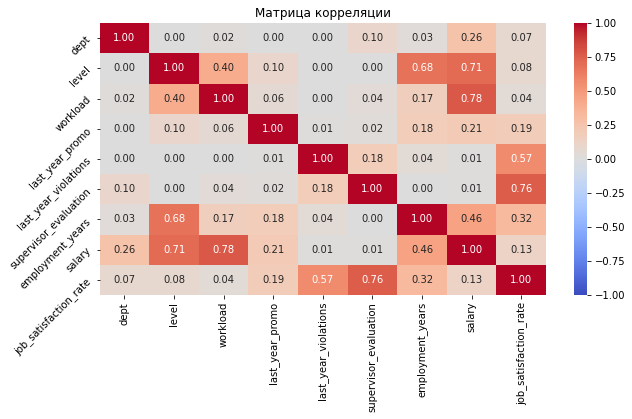

In [71]:
#Тренировочные данные
corr_matrix(
    train_rate,
    cat_corr + num_corr,
    'phik',
    target=target,
    interval_cols=[
        'supervisor_evaluation', 
        'employment_years',
        'salary',
        'job_satisfaction_rate'
    ]
)

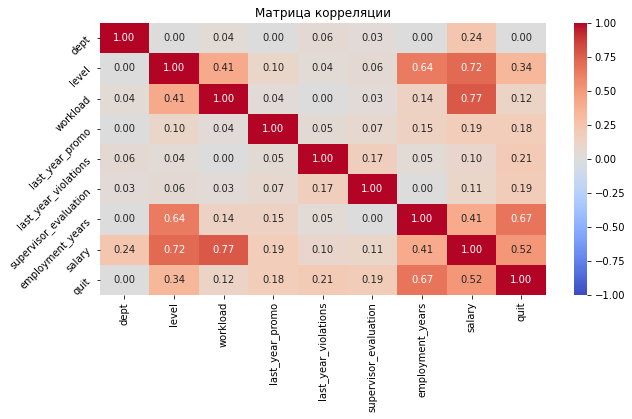

In [72]:
#Тренировочные данные
corr_matrix(train_quit, cat_corr + num_corr, 'phik', target='quit',
    interval_cols=[
        'supervisor_evaluation', 
        'employment_years',
        'salary'
    ])

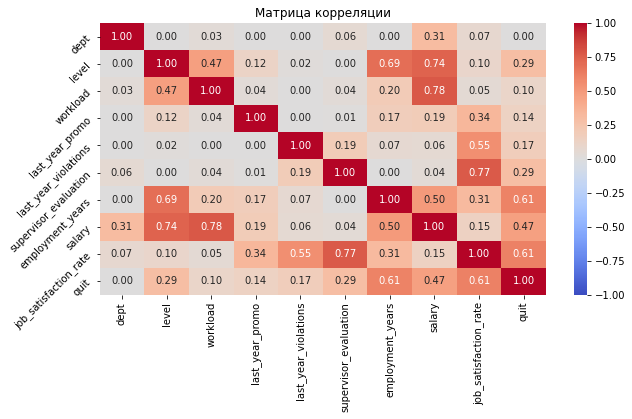

In [73]:
# Тестовые данные
num_corr = [
    'employment_years',
    'salary',
    'job_satisfaction_rate',
]

corr_matrix(test_data, cat_corr + num_corr, 'phik', target='quit',
    interval_cols=[
        'supervisor_evaluation', 
        'employment_years',
        'salary', 
        'job_satisfaction_rate'
    ])

**Промежуточный вывод**

Очень сильной зависимости (мультиколлинеарности) между входными признаками, а также между ними и целевым не выявлено.

Однако, между следующими парами признаков имеется связь:
- `level` и `salary`;
- `level` и `employment_years`;
- `workload` и `salary`;
- `supervisor_evaluation` и `job_satisfaction_rate`;
- `job_satisfaction_rate` и `quit`.

Указанные зависимости логичны. Данные зависимости могут повлиять на обучение моделей, особенно, линейных.

### Вывод по разделу "Исследовательский анализ данных"

В результате проведения исследовательского анализа были выявлены следующие факторы, влияющие на достижение цели работы.

1. Для всех категориальных входных признаков выявлен дисбаланс, который может оказать влияние на результаты анализа данных, в частности:
    1. Признак `level`. Работников уровня "Сеньор" значительно меньше, чем работников других уровней. Конечно, такой дисбаланс связан со спецификой задачи.
    2. Признак `workload`. Загруженность работников также разнится, но достаточно логично. Наибольшее количество работников имеет среднюю загрузку.
    3. Признак `last_year_promo`. Повышение за последний год получили совсем немного работников, что также довольно логично. Указанный признак сложен для обучения модели. Вероятно, модель может не учесть его.
    4. Признак `last_year_violations`. Ситуация аналогична предыдущему признаку.
    5. Признак `dept`. Дисбаланс имеется, но он связан со спецификой задачи.
    
    Устранять дисбаланс входных признаков при обучени линейных моделей дисбаланс устранять не будем. Для повышения точности предсказаний модели для классов, слабо представленных в данных, рекомендуется собрать больше информации.
    При обучении иных моделей используем параметр class_weight для балансировки классов. Это позволит модели лучше учитывать редкие классы и снизить проблему переобучения на популярных классах.

Кроме того, для обучения моделей необходимо провести кодирование категориальных признаков:
1. Категориальные ранговые признаки `workload` (low->medium->high) и `level` (junior -> middle -> sinior) закодируем с используем OrdinalEncoder.
2. Категориальные номинальный признак `dept` и бинарные `last_year_promo`, `last_year_violations`  закодируем с использованем OneHotEncoder, поскольку логичную связь между категориями выстроить нельзя. Кодирование с использованием OrdinalEncoder может привести к тому, что модель может принять, что между категориями есть логичная математическая связь, хотя в действительности её нет.


2. Для всех количественных входных признаков проведен исследовательский анализ и выявлено:
    
    1. В данных были обнаружены выбросы, однако не похожие на аномалии. В связи с этим, выбросы не удалялись.

    2. Ключевые характеристики признаков:
        - `employment_years` - больше всего работников работают в компании в течение 1 года. С увеличением продолжительности работы количество работников уменьшается.
        - `supervisor_evaluation` - больше всего работников получили оценку 4 и 3. Оценку 5 заслужили значительно меньше работников. Также имеются работники, работу которых оценивают неудовлетворительно. Данный признак представляет собой мультиклассовый категориальный ранговый. При обучении моделей закодируем его с использованием OrdinalEncoder, чтобы не увеличивать количество признаков.    
        - `salary` - среднее и медиана близки всех трех блоков данных (средние - 34457.42, 37107.69, 34433.89), минимальные и максимальные значения аналогичны. Распределение величины зарплат визуально представляет собой распределение Пуассона.
        - `supervisor_evaluation` - среднее и медиана близки двух блоков данных (средние - 0.53, 0.55), минимальные и максимальные значения аналогичны. Тренировочные данные второго блока - не анализировались. будут расчитаны после решения первой задачи. Имеются основания говорить о НЕнормальности распределения.

    3. Для корректного обучения моделей необходимо провести масштабирование количественных признаков в связи с большой разницей в мастшатах (отличие `employment_years` и `supervisor_evaluation` от `salary` на 5 порядков). При обучении моделей используем несколько объектов scaler - StandardScaler(), RobustScaler().
    
3. Проведен корреляционный анализ данных. Очень сильной зависимости (мультиколлинеарности) между входными признаками, а также между ними и целевым не выявлено.

    Однако, между следующими парами признаков имеется связь:
    - `level` и `salary`;
    - `level` и `employment_years`;
    - `workload` и `salary`;
    - `supervisor_evaluation` и `job_satisfaction_rate`;
    - `job_satisfaction_rate` и `quit`.

    Указанные зависимости логичны. Данные зависимости могут повлиять на обучение моделей, особенно, линейных.

## Шаг 4.1. Задача 1. Подготовка данных

В результате предыдущих шагов работы были определены ключевые действия по предобработке данных в рамказ pipeline. Подготовим pipeline для обучения моделей с учетом указанных действий.

In [74]:
# Определим типы признаков
categorical_features = [
    'dept',
    'level',
    'workload', 
    'last_year_promo', 
    'last_year_violations',
    'supervisor_evaluation'
]

num_features = [
    'employment_years',
    'salary',
    'job_satisfaction_rate'
]

In [75]:
def load_pipe_task1(
    model=None,
    num_scaler=None,
    ohe_columns=[],
    ord_columns=[],
    num_columns=[]):

    # создадим пайплайн для подготовки признаков из списка ohe_columns: 
    # OHE-кодирование
    ohe_pipe = Pipeline(
        [
            (
                'simpleImputer_ohe', 
                SimpleImputer(
                    missing_values=np.nan,
                    strategy='most_frequent'
                )
            ),
            (
                'ohe', 
                OneHotEncoder(
                    drop='first',
                    handle_unknown='ignore',
                    sparse_output=False
                )
            )
        ]
    )

    # создадим пайплайн для подготовки признаков из списка ord_columns: 
    # OrdinalEncoder-кодирование
    ord_pipe = Pipeline(
        [
            (
                'simpleImputer_before_ord', 
                SimpleImputer(
                    missing_values=np.nan, 
                    strategy='most_frequent'
                )
            ),
            (
                'ord',  
                OrdinalEncoder(
                    # categories=[
                    #     ['junior','middle','sinior'],
                    #     ['low','medium','high'],
                    #     [1,2,3,4,5]
                    # ],
                    handle_unknown='use_encoded_value',
                    unknown_value=np.nan
                )
            ),
            (
                'simpleImputer_after_ord', 
                SimpleImputer(
                    missing_values=np.nan, 
                    strategy='most_frequent'
                )
            )
        ]
    )

    # создадим общий пайплайн для подготовки данных - ohe_pipe 
    # и скэйлеры для количественных столбцов
    data_preprocessor = ColumnTransformer(
        [
            ('ohe', ohe_pipe, ohe_columns),
            ('ord', ord_pipe, ord_columns),
            ('num', num_scaler, num_columns)
        ], 
        remainder='passthrough'
    )
    
    pipe_final = Pipeline(
        [
            ('preprocessor', data_preprocessor),
            ('models', model)
        ]
    )
    
    return pipe_final

In [76]:
X_train_task1 = (
    train_rate[categorical_features + num_features]
    .drop(['job_satisfaction_rate'], axis=1)
)
y_train_task1 = train_rate['job_satisfaction_rate']
X_train_task1.head(3)

,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,employment_years,salary
id,,,,,,,,
155278,sales,junior,medium,no,no,1,2,24000
653870,hr,junior,high,no,no,5,2,38400
184592,sales,junior,low,no,no,2,1,12000


In [77]:
print(X_train_task1.shape, y_train_task1.shape)

(3755, 8) (3755,)


In [78]:
X_test_task1 = (
    test_data[categorical_features + num_features]
    .drop(['job_satisfaction_rate'], axis=1)
)
y_test_task1 = test_data['job_satisfaction_rate']
X_test_task1.head(3)

,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,employment_years,salary
id,,,,,,,,
485046,marketing,junior,medium,no,no,5,2,28800
686555,hr,junior,medium,no,no,4,1,30000
467458,sales,middle,low,no,no,4,5,19200


In [79]:
print(X_test_task1.shape, y_test_task1.shape)

(1998, 8) (1998,)


Не забудем про метрику моделей первой задачи.

In [80]:
def get_smape(y_true, y_pred):
    """
    Функцию для подсчёта метрики SMAPE
    
    :param y_true: pandas.Series or pandas.DataFrame or array-like
    :param y_pred: pandas.Series or pandas.DataFrame or array-like
    """
    
    y_true = y_true.reset_index(drop=True)
    result = 100 * (abs(y_true - y_pred)
                    / ((abs(y_true) + abs(y_pred))/2)).mean()
    return result

In [81]:
# создадим scorer для метрики SMAPE через make_scorer()
smape_score = make_scorer(
    get_smape,
    greater_is_better=False
)

### Вывод по разделу "Подготовка данных"

Пайплайн подготовлен с учетом методов обработки данных и неопределенных элементов в связи с их подборов на последующих этапах работы.
В ходе работы также подготовлены тренировочные и тестовые выборки, разработана функция метрики для моделей первой задачи.

## Шаг 5.1. Задача 1. Обучение моделей

Осуществим работу по обучению моделей.

Для работы выберем два алгоритма регресии: линейную регрессии и дерево решений.

Для лучшей модели подберем гиперпараметры с использованием рандомизированного поиска.

Критерий успеха в обучении моделей - показатель метрики SMAPE меньше, либо равен 15 на ТЕСТОВОЙ выборке. Постараемся достичь заданный результат.

Загрузим pipeline c моделью линейной регрессии LinearRegression(), StandardScaler() и соответствующими списками для кодеров и скейлеров.

In [82]:
ohe_columns = [
    'dept',
    'last_year_promo', 
    'last_year_violations',
]

ord_columns = [
    'level', 
    'workload',
    'supervisor_evaluation',
]

num_columns = [
    'salary',
    'employment_years',
]

In [83]:
pipe_task1_lr = load_pipe_task1(
    model=LinearRegression(),
    num_scaler=StandardScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [84]:
# Обучим модель
pipe_task1_lr.fit(X_train_task1, y_train_task1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'employment_years'])])),
                ('models', LinearRegression())])

In [85]:
cv_result_task1_lr = cross_val_score(
    pipe_task1_lr,
    X_train_task1,
    y_train_task1, 
    scoring=smape_score
)

In [86]:
print(
    'Среднее значение SMAPE: '
    f'{(-1)*cv_result_task1_lr.mean():.2f}'
     )
print(
    'Стандартное отклонение предсказаний: '
    f'{cv_result_task1_lr.std():.2f}'
)

Среднее значение SMAPE: 26.81
Стандартное отклонение предсказаний: 0.47


Значение метрики SMAPE для модели линейной регрессии довольно высоко. Попробуем улучшить показатель. Применим другую модель DecisionTreeRegressor().

In [87]:
pipe_task1_tree = load_pipe_task1(
    model=DecisionTreeRegressor(random_state=RANDOM_STATE),
    num_scaler=StandardScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [88]:
pipe_task1_tree.fit(X_train_task1, y_train_task1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'employment_years'])])),
                ('models', DecisionTreeRegressor(random_state=50))])

In [89]:
cv_result_task1_tree = cross_val_score(
    pipe_task1_tree, 
    X_train_task1, 
    y_train_task1, 
    scoring=smape_score
)

In [90]:
print(
    'Среднее значение SMAPE: '
    f'{(-1)*cv_result_task1_tree.mean():.2f}'
)
print(
    'Стандартное отклонение предсказаний: '
    f'{cv_result_task1_tree.std():.2f}'
)

Среднее значение SMAPE: 16.10
Стандартное отклонение предсказаний: 0.51


Точность модели улучшилась. Подберем дополнительные параметры модели DecisionTreeRegressor() для улучшения. 

In [91]:
# создадим сетку параметров для подбора лучшей модели
param_grid_task1 = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(10, 15),
        'models__max_features': range(10, 15),
        # 'models__max_leaf_nodes': range(2, 15),
        # 'models__criterion': [
        #     'squared_error',
        #     'friedman_mse', 
        #     'absolute_error',
        #     'poisson'
        # ],
        # 'models__splitter': ['best', 'random'],
        'preprocessor__num': [
            StandardScaler(),
            MinMaxScaler(),
            RobustScaler()
        ]  
    }
]

"Играть" параметрами будем по сетке

In [92]:
gs_task1 = GridSearchCV(
    load_pipe_task1(
        model=None,
        num_scaler=None,
        ohe_columns=ohe_columns,
        ord_columns=ord_columns,
        num_columns=num_columns
    ), 
    param_grid_task1, 
    n_jobs=-1,
    cv=5,
    scoring=smape_score
)

In [93]:
gs_task1.fit(X_train_task1, y_train_task1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                                          'supervisor_evaluation']),
                                                                        ('num',
                                                                         None,
                                                                         ['salary',
                                                                          'employment_years'])])),
                                       ('models', None)]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(random_state=50)],
                          'models__max_depth': range(10, 15),
                          'models__max_features': range(10, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]}],
             scoring=make_scorer(get_smape, greater_is_better=False))

In [94]:
print(
    'Метрика SMAPE лучшей модели на тренировочной выборке:',
    gs_task1.best_score_ * (-1)
)

Метрика SMAPE лучшей модели на тренировочной выборке: 15.83359376534301


In [95]:
print('Лучшая модель и её параметры:\n\n', gs_task1.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

Точность модели еще улучшилась. Признаем, что модель DecisionTreeRegressor(max_depth=13, max_features=10, random_state=50) является лучшей.

Предскажем с использованием лучшей модели значения уровня удовлетворенности для тестовых данных. 

In [96]:
y_pred_task1_gs = gs_task1.predict(X_test_task1)

In [97]:
get_smape(y_test_task1, y_pred_task1_gs)

14.568205587274955

Лучшая модель показала хороший результат на тестовых данных. Он удовлетворяет поставленному критерию SMAPE меньше или равно 15.

### Вывод по разделу "Обучение моделей"

В результате работы были обучены две модели: с использованием алгоритма линейной регрессии LinearRegression() и алгоритма дерева решений DecisionTreeRegressor().

На основании результатов кросс-валидации хорошей, но не лучшей признана модель DecisionTreeRegressor(). Модель DecisionTreeRegressor() справилась значительно лучше, поскольку в наших данных отсутсвует линейная зависимость между входными и целевым признаками. Модель дерева решений с такими данным работает лучше.

Однако, было принято решение постараться улучшить результате, изменяя параментры модели DecisionTreeRegressor(). В результате лучшая модель показа метрику SMAPE на тренировочных данных 15.83359376534303.

Метрика SMAPE составила 14.726148940049807 на тестовой выборке. Необходимый результат достигнут.

## Шаг 3.2. Задача 2. Дополнительный анализ данных

Исследовательский анализ категориальных и количественных признаков был произведен ранее. В ходе дополнительно анализа определим:
1. Портрет «уволившегося сотрудника».
2. Влияние коэффициента удовлетворённости работника работой в компании на то, уволится ли работник.

Для дальнейшей работы переведем категориальный целевой признак `quit` в целочисленный вид, как в тренировочной выборке, так и в тестовой.

In [98]:
train_quit_ex = train_quit
test_data_ex = test_data

In [99]:
train_quit['num_quit'] = (
    train_quit['quit']
    .apply(lambda x : 1 if x == 'yes' else 0)
)
test_data['num_quit'] = (
    test_data['quit']
    .apply(lambda x : 1 if x == 'yes' else 0)
)
test_data

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,num_quit
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no,0
686555,hr,junior,medium,1,no,no,4,30000,0.72,no,0
467458,sales,middle,low,5,no,no,4,19200,0.64,no,0
418655,sales,middle,low,6,no,no,4,19200,0.60,no,0
789145,hr,middle,medium,5,no,no,5,40800,0.75,no,0
...,...,...,...,...,...,...,...,...,...,...,...
393147,marketing,junior,low,3,no,no,3,20400,0.56,yes,1
109582,technology,middle,low,3,no,no,2,21600,0.14,yes,1
305653,technology,junior,low,1,no,no,3,14400,0.11,yes,1


In [100]:
train_quit_ex.head(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,num_quit
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0


In [101]:
test_data_ex.head(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,num_quit
id,,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79,no,0


In [102]:
from sklearn.preprocessing import LabelEncoder

# создайте экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()

# обучите модель и трансформируйте тренировочную выборку 
train_quit_ex['quit'] = label_encoder.fit_transform(train_quit_ex['quit'])

# трансформируем тестовую выборку
test_data_ex['quit'] = label_encoder.transform(test_data_ex['quit'])

In [103]:
train_quit_ex.head(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,num_quit
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0,0
814010,sales,junior,medium,2,no,no,4,27600,0,0
155091,purchasing,middle,medium,5,no,no,1,37200,0,0
257132,sales,junior,medium,2,no,yes,3,24000,1,1
910140,marketing,junior,medium,2,no,no,5,25200,0,0


In [104]:
test_data_ex.tail(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit,num_quit
id,,,,,,,,,,,
393147,marketing,junior,low,3,no,no,3,20400,0.56,1,1
109582,technology,middle,low,3,no,no,2,21600,0.14,1,1
305653,technology,junior,low,1,no,no,3,14400,0.11,1,1
160233,technology,middle,low,8,no,no,1,32400,0.43,0,0
771859,purchasing,middle,medium,1,no,no,4,38400,0.67,0,0


### Портрет «уволившегося сотрудника»

Составим портрет «уволившегося сотрудника», в частности:
1. В каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности
2. Сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.
3. Сформулируем описание работника с самой высокой вероятностью увольнения.

In [105]:
table_dept_load = (
    train_quit
    .pivot_table(
        index=['dept', 'workload'],
        values='num_quit',
        aggfunc=['count', 'sum', 'mean']
    )
)
table_dept_load

count      sum      mean
                    num_quit num_quit  num_quit
dept       workload                            
hr         high           66        6  0.090909
           low           107       44  0.411215
           medium        175       32  0.182857
marketing  high          101       19  0.188119
           low           122       47  0.385246
           medium        200       46  0.230000
purchasing high           88       21  0.238636
           low           113       50  0.442478
           medium        229       49  0.213974
sales      high          209       39  0.186603
           low           223       80  0.358744
           medium        373       72  0.193029
technology high          133       24  0.180451
           low           181       70  0.386740
           medium        267       56  0.209738

In [106]:
pivot_mean = table_dept_load['mean'].unstack()
pivot_mean.columns = [
    'Высокая загрузка',
    'Низкая загрузка',
    'Средняя загрузка'
]
pivot_mean

,Высокая загрузка,Низкая загрузка,Средняя загрузка
dept,,,
hr,0.090909,0.411215,0.182857
marketing,0.188119,0.385246,0.230000
purchasing,0.238636,0.442478,0.213974
sales,0.186603,0.358744,0.193029
technology,0.180451,0.386740,0.209738


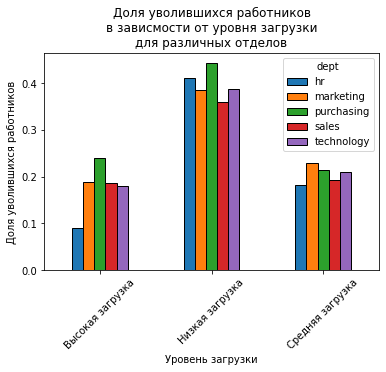

In [107]:
pivot_mean.T.plot(
        kind = 'bar', 
        edgecolor='black',
        rot=45
    )   
plt.title(
    f'Доля уволившихся работников\n'
    'в зависмости от уровня загрузки\n'
    'для различных отделов'
)
plt.ylabel('Доля уволившихся работников')
plt.xlabel('Уровень загрузки')
plt.show()

In [108]:
salary_pivot = (
    train_quit
    .pivot_table(
        index=['quit'],
        values='salary',
        aggfunc=['mean']
    )
)
salary_pivot.columns = ['mean']
salary_pivot['mean'] = round(salary_pivot['mean'], 0)
salary_pivot

,mean
quit,
0,40952.0
1,25768.0


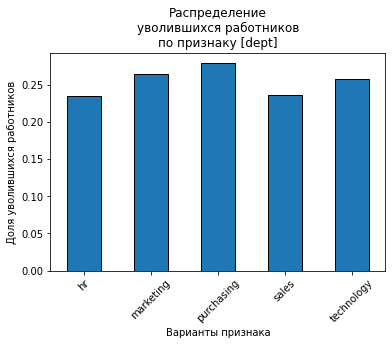

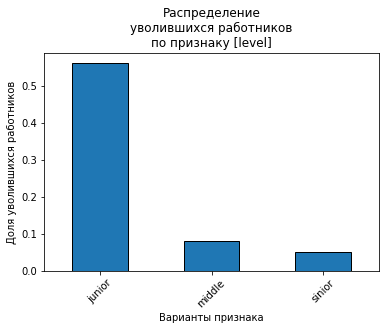

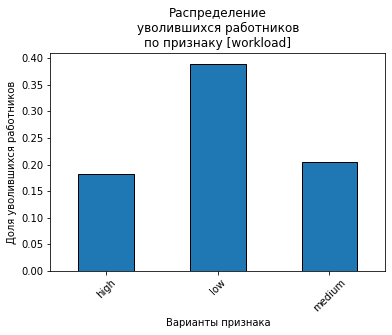

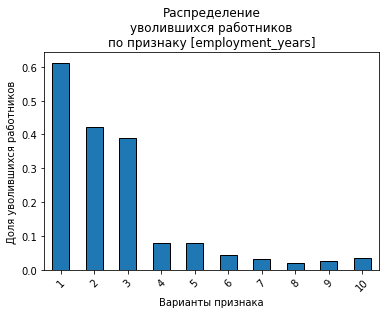

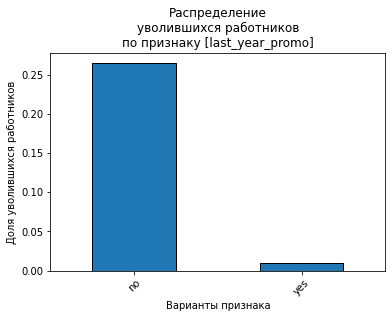

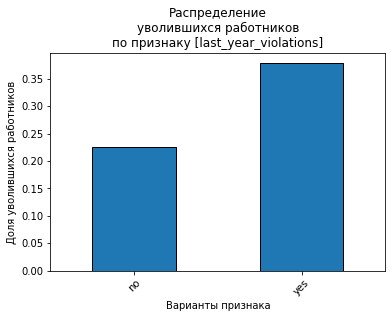

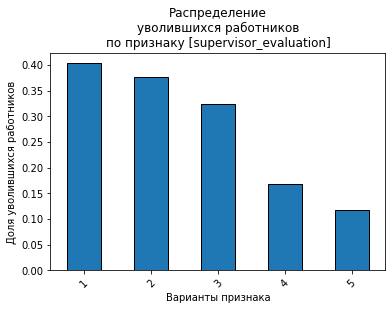

In [109]:
tables = {}
for item in train_quit.drop(['salary', 'quit', 'num_quit'], axis=1):
    tables[item] = (
        train_quit
        .pivot_table(
            index=item,
            values='num_quit',
            aggfunc=['count', 'sum', 'mean']
        )
    )
    tables[item].columns = ['count', 'sum', 'mean']
    tables[item]['mean'].plot(
        kind = 'bar', 
        edgecolor='black',
        rot=45
    )   
    plt.title(f'Распределение\nуволившихся работников\nпо признаку [{item}]')
    plt.ylabel('Доля уволившихся работников')
    plt.xlabel('Варианты признака')
    plt.show()

**Промежуточный вывод**

В результате работы сформулируем портрет «уволившегося сотрудника»:
1. Уволившийся работник с большей вероятностью работает с низким уровнем загрузки в отделе purchasing.
2. Среднее значение зарплаты ушедших работников равно 25768.00, что составялет около 60% от средней зарплаты тех, кто остался в компании.
3. Высокая вероятность быть уволенным у junior специалиста отдела purchasing с зарплатой около 25768.00, который плохо (оценка 1) работает 1 год с низкой загрузкой и, сответственно, не получил повышение, да еще и получил дисциплинарное взыскание.

### Оцека влияния коэффициента удовлетворённости работника работой в компании на то, уволится ли работник.

Визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников. Проверим это на тестовых данных с учетом результатов решения первой задачи.

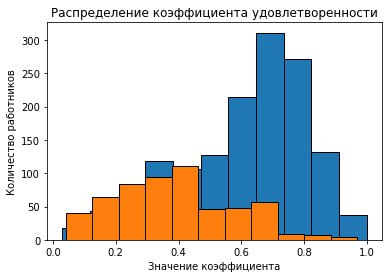

In [110]:
plt.hist(
    (
        test_data
        .query('num_quit == 0')['job_satisfaction_rate']
    ),
    edgecolor='black',
    bins=11
)
plt.hist(
    (
        test_data
        .query('num_quit == 1')['job_satisfaction_rate']
    ),
    edgecolor='black',
    bins=11
)
plt.title('Распределение коэффициента удовлетворенности')
plt.xlabel('Значение коэффициента')
plt.ylabel('Количество работников')
plt.show()

In [112]:
my_describe(
    test_data.query('num_quit == 0'),
    'job_satisfaction_rate',
    desc=['describe']
)
my_describe(
    test_data.query('num_quit == 1'),
    'job_satisfaction_rate',
    desc=['describe']
)


Ключевые характеристики распределения:
count    1434.00
mean        0.61
std         0.20
min         0.03
25%         0.50
50%         0.66
75%         0.76
max         1.00
Name: job_satisfaction_rate, dtype: object

Ключевые характеристики распределения:
count    564.00
mean       0.39
std        0.19
min        0.04
25%        0.24
50%        0.37
75%        0.49
max        0.97
Name: job_satisfaction_rate, dtype: object


**Промежуточный вывод**

В результате анализа выявлено, что среднее значение коэффициента удовлетворенности уволившихся работников - 0.39, а оставшихся - 0.61. Визуально отмечаем сдвиг распределений коэффициента удовлетворенности для уволившихся и оставшихся работников. Предположение подтверждено.

### Вывод по разделу "Дополнительный анализ данных"

1. В результате работы сформулируем портрет «уволившегося сотрудника»:
    1. Уволившийся работник с большей вероятностью работает с низким уровнем загрузки в отделе hr .
    2. Среднее значение зарплаты ушедших работников равно 23885.00, что составялет около 60% от зарплаты тех, кто остался в компании.
    3. Однако, высокая вероятность быть уволенным у junior специалиста отдела technology с зарплатой около 23885.00, который плохо (оценка 1) работает 1 год с низкой загрузкой и, сответственно, не получил повышение, при этом, конечно, не совершал проступков.


2. В результате анализа выявлено, что среднее значение коэффициента удовлетворенности уволившихся работников - 0.4, а оставшихся - 0.61. Визуально отмечаем сдвиг распределений коэффициента удовлетворенности для уволившихся и оставшихся работников. Предположение подтверждено.    

## Шаг 4.2. Задача 2. Подготовка данных (с добавлением нового признака)

**Добавление нового признака**

В результате анализа выявлено, что среднее значение коэффициента удовлетворенности уволившихся работников - 0.4, а оставшихся - 0.61. Визуально отмечаем сдвиг распределений коэффициента удовлетворенности для уволившихся и оставшихся работников. Предположение подтверждено.
Добавим признак `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи тренировочной выборки второго блока.

In [113]:
train_quit.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,num_quit
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0,0
814010,sales,junior,medium,2,no,no,4,27600,0,0
155091,purchasing,middle,medium,5,no,no,1,37200,0,0


In [114]:
X_task2 = train_quit.drop(['quit', 'num_quit'], axis=1)
X_task2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000
814010,sales,junior,medium,2,no,no,4,27600
155091,purchasing,middle,medium,5,no,no,1,37200


In [115]:
train_quit['job_satisfaction_rate'] = gs_task1.predict(X_task2)
train_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,num_quit,job_satisfaction_rate
id,,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0,0,0.660000
814010,sales,junior,medium,2,no,no,4,27600,0,0,0.853529
155091,purchasing,middle,medium,5,no,no,1,37200,0,0,0.360000
257132,sales,junior,medium,2,no,yes,3,24000,1,1,0.380000
910140,marketing,junior,medium,2,no,no,5,25200,0,0,0.690000
...,...,...,...,...,...,...,...,...,...,...,...
778735,technology,junior,low,2,no,no,4,22800,1,1,0.844000
106936,marketing,junior,low,1,no,no,5,18000,0,0,0.860000
775320,technology,junior,high,1,no,no,4,42000,1,1,0.540000


**Промежуточный вывод**

В результате работы в тренировочной и тестовой выборках для решения второй задачи имеются все необходимые признаки. Приступим к подготовке данных к обучению.

**Подготовка данных**

В результате предыдущих шагов работы были определены ключевые действия по предобработке данных в рамках pipeline. 

Создадим новую функцию загрузки pipeline. 

In [116]:
def load_pipe_task2(
    model=None,
    num_scaler=None,
    ohe_columns=[],
    ord_columns=[],
    num_columns=[]):

    # создадим пайплайн для подготовки признаков 
    # из списка ohe_columns: OHE-кодирование
    ohe_pipe = Pipeline(
        [
            (
                'simpleImputer_ohe', 
                SimpleImputer(
                    missing_values=np.nan, 
                    strategy='most_frequent'
                )
            ),
            (
                'ohe', 
                OneHotEncoder(
                    drop='first', 
                    handle_unknown='ignore', 
                    sparse_output=False
                )
            )
        ]
    )

    # создадим пайплайн для подготовки признаков 
    # из списка ord_columns: OrdinalEncoder-кодирование
    ord_pipe = Pipeline(
        [
            (
                'simpleImputer_before_ord', 
                SimpleImputer(
                    missing_values=np.nan, 
                    strategy='most_frequent'
                )
            ),
            (
                'ord',  
                OrdinalEncoder(
                    # categories=[
                    #     ['junior','middle','sinior'],
                    #     ['low','medium','high'],
                    #     [1,2,3,4,5]
                    # ],
                    handle_unknown='use_encoded_value',
                    unknown_value=np.nan
                )
            ),
            (
                'simpleImputer_after_ord', 
                SimpleImputer(
                    missing_values=np.nan, 
                    strategy='most_frequent'
                )
            )
        ]
    )

    # создадим общий пайплайн для подготовки данных 
    # - ohe_pipe и скэйлеры для количественных столбцов
    data_preprocessor = ColumnTransformer(
        [
            ('ohe', ohe_pipe, ohe_columns),
            ('ord', ord_pipe, ord_columns),
            ('num', num_scaler, num_columns)
        ], 
        remainder='passthrough'
    )
    
    pipe_final = Pipeline(
        [
            ('preprocessor', data_preprocessor),
            ('models', model)
        ]
    )
    
    return pipe_final

In [117]:
X_train_task2 = (
    train_quit[categorical_features + num_features]
)
y_train_task2 = train_quit['num_quit']
X_train_task2.head(3)

,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,employment_years,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,no,no,4,2,54000,0.660000
814010,sales,junior,medium,no,no,4,2,27600,0.853529
155091,purchasing,middle,medium,no,no,1,5,37200,0.360000


In [118]:
print(X_train_task2.shape, y_train_task2.shape)

(2587, 9) (2587,)


In [119]:
X_test_task2 = (
    test_data[categorical_features + num_features]
)
y_test_task2 = test_data['num_quit']
X_test_task2.head(3)

,dept,level,workload,last_year_promo,last_year_violations,supervisor_evaluation,employment_years,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,no,no,5,2,28800,0.79
686555,hr,junior,medium,no,no,4,1,30000,0.72
467458,sales,middle,low,no,no,4,5,19200,0.64


In [120]:
print(X_test_task2.shape, y_test_task2.shape)

(1998, 9) (1998,)


### Вывод по разделу "Подготовка данных"

Пайплайн подготовлен с учетом методов обработки данных и неопределенных элементов в связи с их подборов на последующих этапах работы.
В ходе работы также подготовлены тренировочные и тестовые выборки, разработана функция метрики для моделей первой задачи.

## Шаг 5.2. Задача 2. Обучение моделей

Осуществим работу по обучению моделей.

Для работы выберем три модели: LogisticRegression(), SVC(), DecisionTreeClassifier().

Для лучшей модели подберем гиперпараметры с использованием рандомизированного поиска.

Критерий успеха в обучении моделей - показатель метрики ROC-AUC больше, либо равен 0.91 на ТЕСТОВОЙ выборке. Постараемся достичь заданный результат.

Загрузим pipeline c моделью логистической регрессии, StandardScaler() и соответствующими списками для кодеров и скейлеров.

In [121]:
ohe_columns = [
    'dept',
    'last_year_promo', 
    'last_year_violations',
]

ord_columns = [
    'level', 
    'workload',
    'supervisor_evaluation',
]

num_columns = [
    'salary',
    'employment_years',
    'job_satisfaction_rate',
]

In [122]:
pipe_task2_lr = load_pipe_task2(
    model=LogisticRegression(),
    num_scaler=StandardScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [123]:
# Обучим модель
pipe_task2_lr.fit(X_train_task2, y_train_task2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...,
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary', 'employment_years',
                                                   'job_satisfaction_rate'])])),
                ('models', LogisticRegression())])

In [124]:
cv_result_task2_lr = cross_val_score(
    pipe_task2_lr,
    X_train_task2, 
    y_train_task2, 
    scoring='roc_auc'
)

In [125]:
print(
    'Среднее значение ROC-AUC: '
    f'{cv_result_task2_lr.mean():.3f}'
)
print(
    'Стандартное отклонение предсказаний: '
    f'{cv_result_task2_lr.std():.3f}'
)

Среднее значение ROC-AUC: 0.911
Стандартное отклонение предсказаний: 0.014


Значение метрики ROC-AUC для модели логистической регрессии составило 0.911. Попробуем улучшить результат, применив другую модель - SVC().

In [126]:
pipe_task2_svc = load_pipe_task2(
    model=SVC(
        random_state=RANDOM_STATE, 
        probability=True
    ),
    num_scaler=StandardScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [127]:
# Обучим модель
pipe_task2_svc.fit(X_train_task2, y_train_task2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary', 'employment_years',
                                                   'job_satisfaction_rate'])])),
                ('models', SVC(probability=True, random_state=50))])

In [128]:
cv_result_task2_svc = cross_val_score(
    pipe_task2_svc,
    X_train_task2,
    y_train_task2, 
    scoring='roc_auc'
)

In [129]:
print(
    'Среднее значение ROC-AUC: '
    f'{cv_result_task2_svc.mean():.3f}'
)
print(
    'Стандартное отклонение предсказаний: '
    f'{cv_result_task2_svc.std():.3f}'
)

Среднее значение ROC-AUC: 0.902
Стандартное отклонение предсказаний: 0.014


Значение метрики ROC-AUC для модели SVC() составило 0.902, что меньше первой модели. Попробуем еще улучшить результат, применив другую модель - DecisionTreeClassifier().

In [130]:
pipe_task2_tree = load_pipe_task2(
    model=DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        class_weight='balanced'
    ),
    num_scaler=StandardScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [131]:
# Обучим модель
pipe_task2_tree.fit(X_train_task2, y_train_task2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary', 'employment_years',
                                                   'job_satisfaction_rate'])])),
                ('models',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=50))])

In [132]:
cv_result_task2_tree = cross_val_score(
    pipe_task2_tree, 
    X_train_task2, 
    y_train_task2,
    scoring='roc_auc'
)

In [133]:
print(
    'Среднее значение ROC-AUC: '
    f'{cv_result_task2_tree.mean():.3f}'
)
print(
    'Стандартное отклонение предсказаний: '
    f'{cv_result_task2_tree.std():.3f}'
)

Среднее значение ROC-AUC: 0.781
Стандартное отклонение предсказаний: 0.045


Значение метрики ROC-AUC для модели DecisionTreeClassifier() еще ниже: 0.781. Применим поиск гиперпараметров для поиска лучшей модели.

In [134]:
# создадим сетку параметров для подбора лучшей модели
param_grid_task2 = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,
            class_weight='balanced')],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            class_weight='balanced', 
        )],
        'models__C': range(1, 15), 
        'models__penalty': ['l1', 'l2'],
        'models__solver': ['liblinear'],        
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            class_weight='balanced',
            probability=True
        )],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    }
]

In [135]:
# создадим экземпляр RandomizedSearchCV() для быстрого подбора
# гиперпараметров
rs_task2 = RandomizedSearchCV(
    load_pipe_task2(
        model=None,
        num_scaler=None,
        ohe_columns=ohe_columns,
        ord_columns=ord_columns,
        num_columns=num_columns
    ), 
    param_grid_task2, 
    n_jobs=-1,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE
)

In [136]:
rs_task2.fit(X_train_task2, y_train_task2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                        {'models': [LogisticRegression(class_weight='balanced',
                                                                       random_state=50)],
                                         'models__C': range(1, 15),
                                         'models__penalty': ['l1', 'l2'],
                                         'models__solver': ['liblinear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]},
                                        {'models': [SVC(class_weight='balanced',
                                                        probability=True,
                                                        random_state=50)],
                                         'models__C': range(1, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=50, scoring='roc_auc')

In [137]:
print(
    'Метрика ROC-AUC лучшей модели на тренировочной выборке:',
    rs_task2.best_score_
)

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.9110552090823709


In [138]:
print(
    'Лучшая модель и её параметры:\n\n',
    rs_task2.best_estimator_
)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

Точность модели не улучшилась относительно первой модели. Признаем, что модель LogisticRegression(C=8, class_weight='balanced', penalty='l1', random_state=50, solver='liblinear') является лучшей.

Произведем отбор признаков. Возможно метрика улучшится.

In [139]:
pipe = load_pipe_task2(
    model=LogisticRegression(
        C=8,
        class_weight='balanced',
        penalty='l1',
        random_state=50,
        solver='liblinear'
    ),
    num_scaler=MinMaxScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns) 
cr = pipe.named_steps['preprocessor']
X_train_transformed = cr.fit_transform(X_train_task2)
X_train_transformed = pd.DataFrame(
    X_train_transformed, 
    columns=cr.get_feature_names_out()
)

X_test_transformed = cr.transform(X_test_task2)
X_test_transformed = pd.DataFrame(
    X_test_transformed, 
    columns=cr.get_feature_names_out()
)

In [140]:
X_train_transformed.head(3)

,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__last_year_promo_yes,ohe__last_year_violations_yes,ord__level,ord__workload,ord__supervisor_evaluation,num__salary,num__employment_years,num__job_satisfaction_rate
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.500000,0.111111,0.649485
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.185714,0.111111,0.848999
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.300000,0.444444,0.340206


In [141]:
result = []
max_score = 0.
msx_score_num = 0
for i in range(len(X_train_transformed.columns)):
    temp = {}

    selector = SelectKBest(mutual_info_classif, k=i+1)
    selector.fit(X_train_transformed, y_train_task2)

    features_names = X_train_transformed.columns[
        selector.get_support(indices=True)
    ]

    X_train_new = X_train_transformed[list(features_names)]
    X_test_new = X_test_transformed[list(features_names)]

    model = pipe.named_steps['models']

    score = cross_val_score(
        model, 
        X_train_new,
        y_train_task2,
        scoring='roc_auc'
    )
    temp['features_names'] = features_names
    temp['cv_score'] = score.mean()
    if max_score < score.mean():
        msx_score_num = i
        max_score = score.mean()
    result.append(temp)
    print(f'Признаков - {i+1} ---> метрика {score.mean()}')

Признаков - 1 ---> метрика 0.8062235596407836
Признаков - 2 ---> метрика 0.8632258032866403
Признаков - 3 ---> метрика 0.895747921640722
Признаков - 4 ---> метрика 0.9008973612504892
Признаков - 5 ---> метрика 0.9016667959525048
Признаков - 6 ---> метрика 0.9102991347251439
Признаков - 7 ---> метрика 0.9103031717137711
Признаков - 8 ---> метрика 0.9112882224893788
Признаков - 9 ---> метрика 0.9117181208972825
Признаков - 10 ---> метрика 0.9111362068720584
Признаков - 11 ---> метрика 0.9115365330607395
Признаков - 12 ---> метрика 0.9111993985193552


Так и есть, при меньшем количестве признаков значение метрики увеличивается.

In [142]:
result[msx_score_num]

{'features_names': Index(['ohe__dept_technology', 'ohe__last_year_promo_yes',
        'ohe__last_year_violations_yes', 'ord__level', 'ord__workload',
        'ord__supervisor_evaluation', 'num__salary', 'num__employment_years',
        'num__job_satisfaction_rate'],
       dtype='object'),
 'cv_score': 0.9117181208972825}

В результате отбора признаков мы видим, что два из кодированных признаков признака `dept` статистически малоинформативнны. С точни зрения полезности признаков, возможно, стоит исключить признак `dept` из модели. После анализа признаков уточним этот момент.

Обучим лучшую модель.

In [164]:
best_model = LogisticRegression(
    C=8,
    class_weight='balanced',
    penalty='l1',
    random_state=50,
    solver='liblinear'
)

In [165]:
best_pipe = load_pipe_task2(
    model=best_model,
    num_scaler=MinMaxScaler(),
    ohe_columns=ohe_columns,
    ord_columns=ord_columns,
    num_columns=num_columns)

In [166]:
crb = best_pipe.named_steps['preprocessor']
X_train_transformed = cr.fit_transform(X_train_task2)
X_train_transformed = pd.DataFrame(
    X_train_transformed, 
    columns=cr.get_feature_names_out()
)

X_test_transformed = cr.transform(X_test_task2)
X_test_transformed = pd.DataFrame(
    X_test_transformed,
    columns=cr.get_feature_names_out()
)

In [167]:
best_model.fit(X_train_transformed, y_train_task2)

LogisticRegression(C=8, class_weight='balanced', penalty='l1', random_state=50,
                   solver='liblinear')

*Проведем анализ SHAP-значений.*

In [168]:
explainer = shap.LinearExplainer(best_model, X_test_transformed)
shap_values = explainer(X_test_transformed)

Построим график общей значимости признаков. Столбчатая диаграмма отражает общий вклад признаков в прогнозы модели. Она показывает средние SHAP-значения признака по всем наблюдениям. 

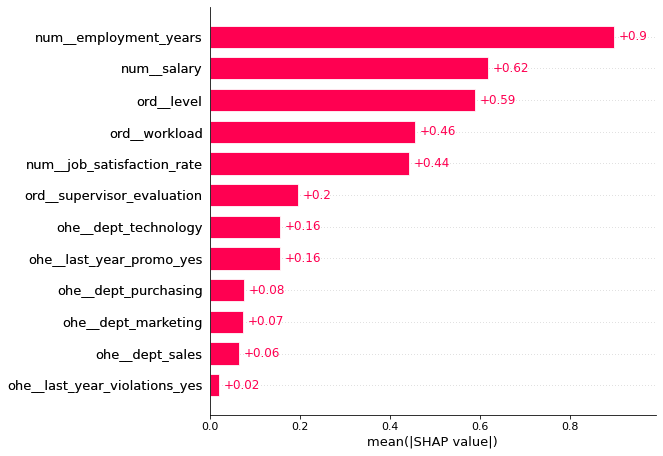

In [169]:
shap.plots.bar(shap_values, max_display=None) 

Лидирует признак "employment_years", "salary" и "level" вносят значительный вклад в предсказания модели, "workload" и "job_satisfaction_rate" - меньше. В целом, признак "dept" может быть бесполезен. Признаки, показывающие повышения и проступки малоинформативны, вероятно, в связи с тем, что у модели было мало примеров таких данных для обучения.

*Посмотрим, как признаки влияют на каждое предсказание модели*

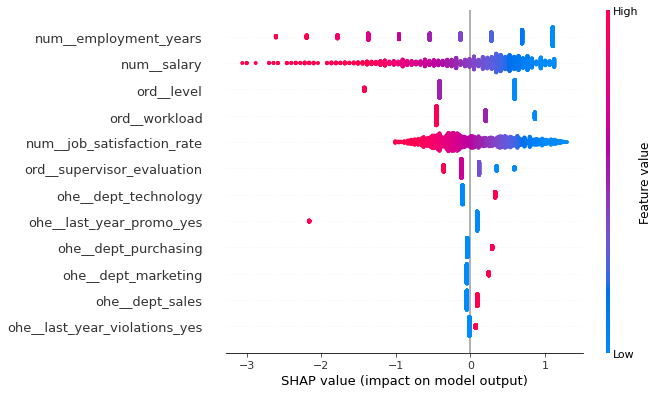

In [170]:
shap.plots.beeswarm(shap_values, max_display=None)

В рамках конкретных предсказаний, то чем дольше работник работает в компании и чем выше уго зарплата, тем меньше вероятность его увольнения. Аналогично влияет уровень удовлетворенности, уровень работника, загрузка, оценка руководителя.

Максимальное влияние на предсказание класса 1 "работник уволится" оказывает уровень его удовлетворенности. Следует обратить внимание на не сильно удовлетворенных работой молодых специалистов с низкой зарплатой и низкой загрузкой. Если и руководитель их оценивает отрицательно, то очень высока вероятноть увольнения такого специалиста.

Данный вывод подтверждает представленный ранее портрет уволившегося работника.

"Пересоберем" дата-сет с учетом анализа признаков.

In [171]:
X_train_task2_new = (
    train_quit[categorical_features + num_features]
    .drop(['dept', 'last_year_violations'], axis=1)
)
y_train_task2_new = train_quit['num_quit']
X_train_task2_new.head(3)

,level,workload,last_year_promo,supervisor_evaluation,employment_years,salary,job_satisfaction_rate
id,,,,,,,
723290,middle,high,no,4,2,54000,0.660000
814010,junior,medium,no,4,2,27600,0.853529
155091,middle,medium,no,1,5,37200,0.360000


In [172]:
print(X_train_task2_new.shape, y_train_task2_new.shape)

(2587, 7) (2587,)


In [173]:
X_test_task2_new = (
    test_data[categorical_features + num_features]
    .drop(['dept', 'last_year_violations'], axis=1)
)
y_test_task2_new = test_data['num_quit']
X_test_task2_new.head(3)

,level,workload,last_year_promo,supervisor_evaluation,employment_years,salary,job_satisfaction_rate
id,,,,,,,
485046,junior,medium,no,5,2,28800,0.79
686555,junior,medium,no,4,1,30000,0.72
467458,middle,low,no,4,5,19200,0.64


In [174]:
print(X_test_task2_new.shape, y_test_task2_new.shape)

(1998, 7) (1998,)


In [175]:
# создадим сетку параметров для подбора лучшей модели
param_grid_task2_new = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,
            class_weight='balanced')],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            class_weight='balanced', 
        )],
        'models__C': range(1, 15), 
        'models__penalty': ['l1', 'l2'],
        'models__solver': ['liblinear'],        
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            class_weight='balanced',
            probability=True
        )],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    }
]

In [176]:
ohe_columns = [
    'last_year_promo',
]

ord_columns = [
    'level', 
    'workload',
    'supervisor_evaluation',
]

num_columns = [
    'salary',
    'employment_years',
    'job_satisfaction_rate',
]

In [177]:
# создадим экземпляр RandomizedSearchCV() для быстрого подбора
# гиперпараметров
rs_task2_new = RandomizedSearchCV(
    load_pipe_task2(
        model=None,
        num_scaler=None,
        ohe_columns=ohe_columns,
        ord_columns=ord_columns,
        num_columns=num_columns
    ), 
    param_grid_task2, 
    n_jobs=-1,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE
)

In [178]:
rs_task2_new.fit(X_train_task2_new, y_train_task2_new)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['last_year_promo']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_b...
                                        {'models': [LogisticRegression(class_weight='balanced',
                                                                       random_state=50)],
                                         'models__C': range(1, 15),
                                         'models__penalty': ['l1', 'l2'],
                                         'models__solver': ['liblinear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]},
                                        {'models': [SVC(class_weight='balanced',
                                                        probability=True,
                                                        random_state=50)],
                                         'models__C': range(1, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=50, scoring='roc_auc')

In [179]:
print(
    'Метрика ROC-AUC лучшей модели на тренировочной выборке:', 
    rs_task2_new.best_score_
)

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.9139937346250374


In [180]:
print('Лучшая модель и её параметры:\n\n', rs_task2_new.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                

Лучшая модель была уточнена. Метрика ROC-AUC на тренировочной выборке показывает 0.914. Новая модель: SVC(C=9, class_weight='balanced', probability=True, random_state=50)

Признаем лучшей указанную модель с учетом исключения признака `dept`!

Проверим работу нашей лучшей модели на тестовых данных.

In [181]:
y_prob_task2_rs_new = rs_task2_new.predict_proba(X_test_task2_new)[:, 1]

In [182]:
roc_auc_score(y_test_task2_new, y_prob_task2_rs_new)

0.9264048389170797

Модель SVC() показала на тестовых данных очень хороший результат. Он выше требуемого значения метрики ROC-AUC: 0.924 > 0.910.

### Вывод по разделу "Обучение моделей"

В результате работы были обучены три модели: LogisticRegression(), SVC(), DecisionTreeClassifier().

Первоначальное обучение моделей дало следующие результаты:
- для модели LogisticRegression(): ROC-AUC=0.911 на тренировочной выборке;
- для модели SVC(): ROC-AUC=0.902 на тренировочной выборке;
- для модели DecisionTreeClassifier(): ROC-AUC=0.781 на тренировочной выборке.

Лучшая модель на первом этапе - LogisticRegression(). 

Было принято решение постараться улучшить результаты, изменяя параметры моделей. В результате подбора гиперпараметров была вывлевлена лучшая модель - LogisticRegression(C=11, class_weight='balanced', random_state=50, solver='liblinear'). Метрика ROC-AUC на тренировочной выборке - 0.911.

Для улучшения метрики произведен отбор признаков. При меньшем количестве признаков (с учетом проведения статистического теста их количество постоянно разное) значение метрики увеличивается. Малоинформативным признан признак `dept`.

В дальнейшем для лучшей модели были проанализированы SHAP-значения для интерпретации модели и отбора признаков. Выявлено, что признак `dept`, действительно, можно попробовать исключить.

Из тренировочных данных был исключен указанный признак и снова произведен поиск лучшей модели. Лучшая модель была уточнена. Метрика ROC-AUC на тренировочной выборке показывает 0.914. Новая модель: SVC(C=9, class_weight='balanced', probability=True, random_state=50). Признали лучшей указанную модель с учетом исключения признака dept!

В итого была проверена работа нашей лучшей модели на тестовых данных. Итоговый результат ROC-AUC на тестовой выборке составил - 0.924 > 0.910. Задача выполнена.

# Итоговый вывод

В соответствии с планом работы были достигнуты следующие результаты.

**А. Изучение входных данных**

Для проведения исследования была полученые выборки из 10_000 записей о работниках. Можно сделать _предварительный_ вывод, что предоставленных данных достаточно для достижения цели исследования. Были выявлены некоторые проблемы с входными данными, требующие предобработки: пропуски в данных, возможные дубликаты. Особенностью данных является их представление в виде различных таблиц. Были сделаны предположения о возможном дублировании работников в разных таблицах.

**Б. Предобработка данных**

В ходе предобработки данных:

1. Предварительно были проверены два предположения о возможном дублировании в разных таблицах. Предположения явно не подтвердились. Однако выявлено, что они все же неявно дублируются. В каждой таблце представлены одинаковые работники с разными id. Возможно, это не дублирующие работника, но разные. При этом, анкетные данные одинаковые, следовательно, они не могут нести различную информацию для модели машинного обучения. Все дубликаты удалены.

2. Изучены пропуски в данных. Пропуски данных в столбцах `dept` и `level` в таблицах `train_rate` и `test_data` сложно заполнить на основании логических выводов по другим данным. Указанные пропуски могли появиться в результате заполнения работниками анкет. Не все работники могли указать требуемые данные или пропустить их случайно или специально. Такие пропуски могут появиться в данных, на которых в будущем будет работать модель. При этом, пропуски могут появиться в любом столбце. В этой связи принято решение применить метод обработки пропусков, который может быть использован как при обучении, так и при оценке качества моделей и в продакшн. 

3. В тестовых данных выявлены неизвестные значения для категориальных признаков dept и workload - пробелы! Фактически, это пропуски данных. Обработку неявлных дубликатов в тестовых данных принято решение не осуществлять. Такие дубликаты могут появиться в данных, на которых в будущем будет работать модель. В этой связи принято решение учесть обнаруженные дубликаты при разработке моделей при кодировании категориальных признаков как обработку неизвестных значений.

4. Изменение типа данных столбцов нецелесообразно, поскульку указанные столбцы подлежать дальнейшему кодированию, а реальные данные будут поступать в модель в исходом виде.

**В. Результаты исследовательского анализа**

В результате проведения исследовательского анализа были выявлены ряд факторов, влияющих на достижение цели исследования.

1. Для всех категориальных входных признаков выявлен дисбаланс, который может оказать влияние на результаты анализа данных. Устранять дисбаланс входных признаков при обучени линейных моделей дисбаланс устранять не будем. Для повышения точности предсказаний модели для классов, слабо представленных в данных, рекомендуется собрать больше информации. При обучении иных моделей принято решение использовать дополнительные параметры для балансировки классов. Это позволит модели лучше учитывать редкие классы и снизить проблему переобучения на популярных классах. Кроме того, для обучения моделей решено провести кодирование категориальных признаков.

2. Для всех количественных входных признаков проведен анализ, выбросов не выявлено. Для корректного обучения моделей выявлена необходимость масштабирования количественных признаков.

3. Проведен корреляционный анализ данных. Очень сильной зависимости (мультиколлинеарности) между входными признаками, а также между ними и целевым не выявлено. Однако, между следующими парами признаков имеется связь. Указанные зависимости логичны. Данные зависимости могут повлиять на обучение моделей, особенно, линейных.
    - `level` и `salary`;
    - `level` и `employment_years`;
    - `workload` и `salary`;
    - `supervisor_evaluation` и `job_satisfaction_rate`;
    - `job_satisfaction_rate` и `quit`.


4. В результате работы сформулируем портрет «уволившегося сотрудника»:
    1. Уволившийся работник с большей вероятностью работает с низким уровнем загрузки в отделе hr .
    2. Среднее значение зарплаты ушедших работников равно 23885.00, что составялет около 60% от зарплаты тех, кто остался в компании.
    3. Однако, высокая вероятность быть уволенным у junior специалиста отдела technology с зарплатой около 23885.00, который плохо (оценка 1) работает 1 год с низкой загрузкой и, сответственно, не получил повышение, при этом, конечно, не совершал проступков.

5. В результате анализа выявлено, что среднее значение коэффициента удовлетворенности уволившихся работников - 0.4, а оставшихся - 0.61. Визуально отмечаем сдвиг распределений коэффициента удовлетворенности для уволившихся и оставшихся работников. Предположение подтверждено.    

**Г. Подготовка данных**

Для дальнейшего анализа выполнены следующие работы:
- разработаны средства автоматизации процесса обучения моделей (pipeline) с учетом результатов предобработки данных;
- для решения задачи № 2 на основании результатов решения задачи № 1 в тренировочные данные второго блока добавлены отсутствующие входные признаки;
- подготовлены выборки для обучения моделей.

**Д. Разработка моделей машинного обучения**

В результате поиска лучших моделей достигнуты следующие результаты для задачи № 1:

1. В результате работы были обучены две модели: с использованием алгоритма линейной регрессии LinearRegression() и алгоритма дерева решений DecisionTreeRegressor().
2. Первоначальное обучение моделей дало плохой результат для модели LinearRegression(): SMAPE=25.14626197538772 на тестовой выборке; и хороший результат для модели DecisionTreeRegressor():  SMAPE=14.786665613907974 на тестовой выборке. Модель DecisionTreeRegressor() справилась значительно лучше, поскольку в наших данных отсутсвует линейная зависимость между входными и целевым признаками. Модель дерева решений с такими данным работает лучше.
3. Однако, было принято решение постараться улучшить результате, изменяя параментры модели DecisionTreeRegressor().
4. Необходимый результат достигнут. Метрика SMAPE составила 14.726148940049807 на тестовой выборке.

В результате поиска лучших моделей достигнуты следующие результаты для задачи № 2:
    
1. В результате работы были обучены три модели: LogisticRegression(), SVC(), DecisionTreeClassifier().
2. Первоначальное обучение моделей дало следующие результаты:
    - для модели LogisticRegression(): ROC-AUC=0.911 на тренировочной выборке;
    - для модели SVC(): ROC-AUC=0.902 на тренировочной выборке;
    - для модели DecisionTreeClassifier(): ROC-AUC=0.781 на тренировочной выборке.
3. Лучшая модель на первом этапе - LogisticRegression(). 
4. Было принято решение постараться улучшить результаты, изменяя параметры моделей. В результате подбора гиперпараметров была вывлевлена лучшая модель - LogisticRegression(C=11, class_weight='balanced', random_state=50, solver='liblinear'). Метрика ROC-AUC на тренировочной выборке - 0.911.
5. Для улучшения метрики произведен отбор признаков. При меньшем количестве признаков (с учетом проведения статистического теста их количество постоянно разное) значение метрики увеличивается. Малоинформативным признан признак `dept`.
6. В дальнейшем для лучшей модели были проанализированы SHAP-значения для интерпретации модели и отбора признаков. Выявлено, что признак `dept`, действительно, можно попробовать исключить.
7. Из тренировочных данных был исключен указанный признак и снова произведен поиск лучшей модели. Лучшая модель была уточнена. Метрика ROC-AUC на тренировочной выборке показывает 0.914. Новая модель: SVC(C=9, class_weight='balanced', probability=True, random_state=50). Признали лучшей указанную модель с учетом исключения признака dept!
8. В итого была проверена работа нашей лучшей модели на тестовых данных. Итоговый результат ROC-AUC на тестовой выборке составил - 0.924 > 0.910. Задача выполнена.



**Е. Достижение цели работы**

Таким образом, в результате работы разработаны модели, предсказывающие:
- уровень удовлетворённости работника;
- факт увольнение работника из компании.

**Цель работы достинута - на основании исходных данных разработаны соответствующие модели.**

В то же время, критерии успеха по задачам достигнуты не в полной мере:
- по задаче № 1 критерий успеха **достигнут** - метрика SMAPE составила 14.73 < 15 на тестовой выборке.
<del>- по задаче № 2 критерий успеха **не достигнут** - метрика ROC-AUC составила 0.88 < 0.91 на тестовой выборке.</del>
- по задаче № 2 критерий успеха **достигнут** - метрика ROC-AUC составила 0.92 > 0.91 на тестовой выборке.




_**В результате работы отмечено, то чем дольше работник работает в компании и чем выше уго зарплата, тем меньше вероятность его увольнения. Аналогично влияет уровень удовлетворенности, уровень работника, загрузка, оценка руководителя.**_

_**Максимальное влияние на предсказание класса 1 "работник уволится" оказывает уровень его удовлетворенности. Следует обратить внимание на не сильно удовлетворенных работой молодых специалистов с низкой зарплатой и низкой загрузкой. Если и руководитель их оценивает отрицательно, то очень высока вероятноть увольнения такого специалиста.**_

_**Данный вывод подтверждает представленный ранее портрет уволившегося работника.**_